In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("concatenated_companies.csv")

In [3]:
df.head()

,company,city,country,employees,employee type,revenues,revenue type,company type,website,sector,...,CEO,CEO gender,stack,CEO approval,ESG score,environmental score (ESG),social score (ESG),governance score (ESG),alternate websites,talking points
0,Ecopetrol,Bogotá,Colombia,NaN,actual,32284090723,actual,public,https://www.ecopetrol.com.co,Energy,...,Luis Felipe Rivera Garcia,male,google analytics,NaN,63.702606,16.259518,26.654757,24.459248,NaN,"Ecopetrol | Energía y SosTECnibilidad®, Bienve..."
1,SENA,Bogotá,Colombia,26271.0,estimate,29306863367,estimate,private,https://sena.edu.co,Consumer Discretionary,...,NaN,NaN,NaN,NaN,84.385950,28.002964,26.974150,24.499004,NaN,"The URL you requested has been blocked, Cuenta..."
2,Airfrance,Colombia,Colombia,45000.0,estimate,15085477564,estimate,private,https://wwws.airfrance.com.co,Industrials,...,NaN,NaN,NaN,NaN,70.863940,29.871284,28.187340,23.887934,NaN,Avión Al Mejor Precio - Vuelos Air France Colo...
3,Grupo SURA,Medellín,Colombia,NaN,actual,9339806455,actual,private,https://www.gruposura.com,Financials,...,Ricardo Jaramillo Mejia,male,google analytics,NaN,79.558290,40.969627,20.279213,20.825842,NaN,Grupo SURAGestor de inversiones con foco en se...
4,Uniandes,Bogotá,Colombia,16052.0,estimate,9324771018,estimate,private,https://uniandes.edu.co,Consumer Discretionary,...,NaN,NaN,google analytics,NaN,84.385950,28.002964,26.974150,24.499004,NaN,"Home | University of Los Andes, The University..."


In [4]:
df.shape

(86955, 30)

Despues de realizar la concatenacion de los dos dataset, se pueden verificar que hay 86955 empresas , por 30 columnas, sumando empresas tanto de colombia, como de españa es buen comienzo, ahora vamos a ajustar tipos de datos , valores missing y demas temas iniciales que realizamos en un EDA.

In [5]:
df.dtypes

company                       object
city                          object
country                       object
employees                    float64
employee type                 object
revenues                       int64
revenue type                  object
company type                  object
website                       object
sector                        object
industry                      object
foundation year              float64
LinkedIn link                 object
LinkedIn followers           float64
X link                        object
X username                    object
X followers                  float64
tweets                       float64
Facebook link                 object
Instagram link                object
CEO                           object
CEO gender                    object
stack                         object
CEO approval                 float64
ESG score                    float64
environmental score (ESG)    float64
social score (ESG)           float64
g

In [6]:
#valores Unicos de mis datos
df.nunique()

company                      86186
city                          2318
country                          2
employees                     3019
employee type                    2
revenues                     51320
revenue type                     2
company type                     2
website                      86955
sector                          11
industry                        58
foundation year                205
LinkedIn link                61725
LinkedIn followers            6667
X link                       35973
X username                   28011
X followers                   7895
tweets                       10343
Facebook link                27748
Instagram link               25374
CEO                            109
CEO gender                       2
stack                          133
CEO approval                    15
ESG score                      166
environmental score (ESG)      104
social score (ESG)             104
governance score (ESG)         104
alternate websites  

El dataset contiene 30 columnas que cubren detalles de empresas, finanzas, presencia en redes sociales, liderazgo, métricas ESG y tecnologías utilizadas
**Hay 86,186 compañías únicas, lo que sugiere unas 86,000 filas en el dataframe.
**Muchas columnas de redes sociales tienen menos valores únicos que compañías, indicando datos faltantes.
**La columna CEO tiene 110 valores únicos para 86,000 compañías, sugiriendo muchos datos faltantes o CEOs compartidos

**DESCRIPTIVOS VARIABLES NUMERICOS**

In [7]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
employees,86929.0,321.57,2.631030e+03,1.00,61.00,130.00,199.00,3.945000e+05
revenues,86955.0,48040533.80,5.749278e+08,8.00,10630434.00,22301490.00,30757072.00,5.575241e+10
foundation year,47940.0,1997.98,2.177000e+01,1802.00,1992.00,2005.00,2012.00,2.023000e+03
LinkedIn followers,31488.0,4593.08,6.120796e+04,2.00,118.00,406.00,1480.00,5.528146e+06
X followers,28043.0,23602.74,5.742834e+05,1.00,179.00,648.00,2379.00,4.931829e+07
tweets,27843.0,8453.10,3.619673e+04,1.00,379.00,1486.00,5185.00,1.188435e+06
CEO approval,17.0,68.29,2.970000e+01,0.00,57.00,74.00,91.00,1.000000e+02
ESG score,86955.0,82.66,3.690000e+00,63.70,81.54,82.72,84.26,9.031000e+01
environmental score (ESG),86955.0,30.55,6.340000e+00,15.23,26.59,26.59,35.74,4.325000e+01
social score (ESG),86955.0,30.20,2.640000e+00,18.79,29.39,31.73,31.73,3.361000e+01


### Observaciones:
*Distribuciones Sesgadas*
* employees  (media 321.57, mediana 130, máx 394,500): Muy sesgada; pocas empresas grandes dominan (Ej, Santander con 199,958 empleados).
* revenues (media 48.04M, mediana 22.3M, máx 55.75B): Extremo sesgo; transformación logarítmica recomendada.
* LinkedIn followers, X followers, tweets: Medianas bajas (406, 648, 1,486) pero máximos altos, indicando presencia digital concentrada en grandes empresas.
* Antigüedad (foundation year): Mediana 2005, rango 1802–2023. Muchas empresas jóvenes, pero algunas históricas. Falta en 45% de filas.
* Puntajes ESG: Rangos estrechos (e.g., ESG score 63.7–90.31, media 82.66). Baja variabilidad (std 3.69); posible sistema estandarizado. Subpuntajes (environmental, social, governance) suman aproximadamente al puntaje total.
 * CEO approval: Solo 17 valores; media 68.29 (escala 0–100). Poco útil debido a escasez.


In [8]:
# Número de valores distintos por variable
df.describe(exclude=np.number)

,company,city,country,employee type,revenue type,company type,website,sector,industry,LinkedIn link,X link,X username,Facebook link,Instagram link,CEO,CEO gender,stack,alternate websites,talking points
count,86955,56294,86955,86954,86955,86955,86955,57619,52361,61877,36456,28143,29852,25507,113,110,59993,440,81509
unique,86186,2318,2,2,2,2,86955,11,58,61725,35973,28011,27748,25374,109,2,133,440,81067
top,ROJADIRECTA,Madrid,Spain,estimate,estimate,private,https://www.ecopetrol.com.co,Industrials,Media,https://www.linkedin.com/company/hm-hospitales,https://x.com/prestashop,CaixaBank,https://www.facebook.com/pages,https://www.instagram.com/ciber_investiga,Cesar Gonzalez-Bueno Mayer Wittgenstein,male,google analytics,https://panama.grupobancolombia.com,Just a moment...
freq,6,12024,78600,86824,86824,86850,1,14820,7171,4,66,4,1589,7,2,103,11817,1,60


In [9]:
# Obtener Valores Unicos de cada columna
df.apply(lambda x: len(x.unique())).to_frame()

,0
company,86186
city,2319
country,2
employees,3020
employee type,3
revenues,51320
revenue type,2
company type,2
website,86955
sector,12


### Conversión a factor de toda variable con menos de 10 valores distintos 

Utilizamos el .loc para filtrar por condición sobre valores únicos de variables y creamos la lista de columnas que deberían pasar a factor. Posteriormente, se utiliza astype para pasar a categórica.

In [10]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(df.loc[:,df.nunique() < 10]);  

# Podemos cambiar el tipo de todas ellas a factor de una vez
df[to_factor] = df[to_factor].astype('category')

In [11]:
# luego convertiremos variables numericas 
numeric_cols = ['employees', 'revenues', 'foundation year', 'LinkedIn followers', 'X followers', 'tweets', 'CEO approval', 'ESG score', 'environmental score (ESG)', 'social score (ESG)', 'governance score (ESG)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86955 entries, 0 to 86954
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   company                    86955 non-null  object  
 1   city                       56294 non-null  object  
 2   country                    86955 non-null  category
 3   employees                  86929 non-null  float64 
 4   employee type              86954 non-null  category
 5   revenues                   86955 non-null  int64   
 6   revenue type               86955 non-null  category
 7   company type               86955 non-null  category
 8   website                    86955 non-null  object  
 9   sector                     57619 non-null  object  
 10  industry                   52361 non-null  object  
 11  foundation year            47940 non-null  float64 
 12  LinkedIn link              61877 non-null  object  
 13  LinkedIn followers         3148

In [13]:
#Valores Mising
df.apply(lambda x: x.isna().sum()/x.count()*100)

company                           0.000000
city                             54.465840
country                           0.000000
employees                         0.029909
employee type                     0.001150
revenues                          0.000000
revenue type                      0.000000
company type                      0.000000
website                           0.000000
sector                           50.913761
industry                         66.068257
foundation year                  81.382979
LinkedIn link                    40.528791
LinkedIn followers              176.152820
X link                          138.520408
X username                      208.975589
X followers                     210.077381
tweets                          212.304709
Facebook link                   191.287016
Instagram link                  240.906418
CEO                           76851.327434
CEO gender                    78950.000000
stack                            44.941910
CEO approva

Si bien dentro dentro de la informacion arrojada podemos establecer ciertos criterios para entender la calidad 
de los datos, como son:
* Filas: 86,955 (según conteos de revenues/ESG score).
* Columnas completas o casi completas: company, revenues, revenue type, company type, website, ESG score, environmental score (ESG), social score (ESG), governance score (ESG) tienen casi 0% de datos faltantes.
* Alta faltante (>99%): CEO approval (99.98%), CEO gender (99.87%), CEO (99.87%), alternate websites (99.49%). Estos son casi inutilizables salvo para empresas grandes/públicas.
* Faltante moderada-alta (60–70%): Redes sociales (Instagram link 70.67%, tweets 67.98%, X followers 67.75%, etc.) y LinkedIn link (28.84%). Probablemente refleja empresas pequeñas sin presencia digital.
* Faltante moderada (30–45%): foundation year (44.87%), industry (39.78%), city (35.26%), sector (33.74%). Puede deberse a datos inconsistentes o no reportados.
* Columnas numéricas: employees, revenues, foundation year, LinkedIn followers, X followers, tweets, CEO approval, puntajes ESG.
* Columnas categóricas: city, country, employee type, revenue type, company type, sector, industry, CEO gender, stack.
 * Texto/Identificadores: company, website, LinkedIn link, X link, X username, Facebook link, Instagram link, alternate websites, talking points.

### ANALISIS UNIVARIADO


Columnas Numericas: employees


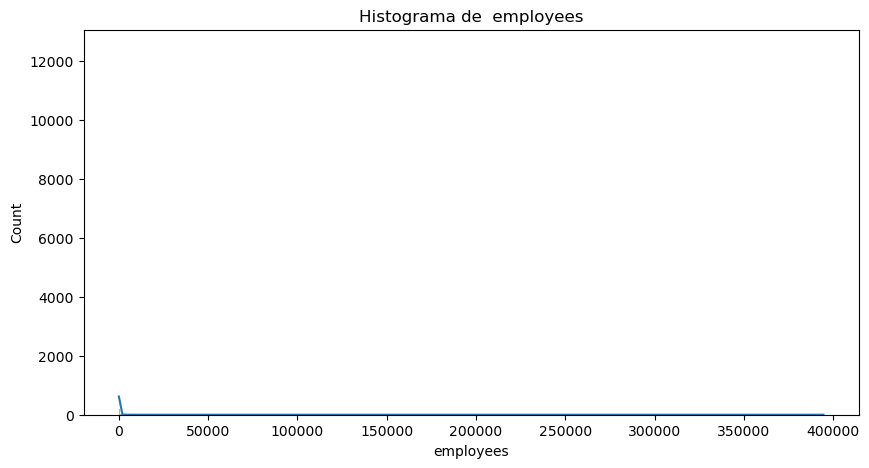

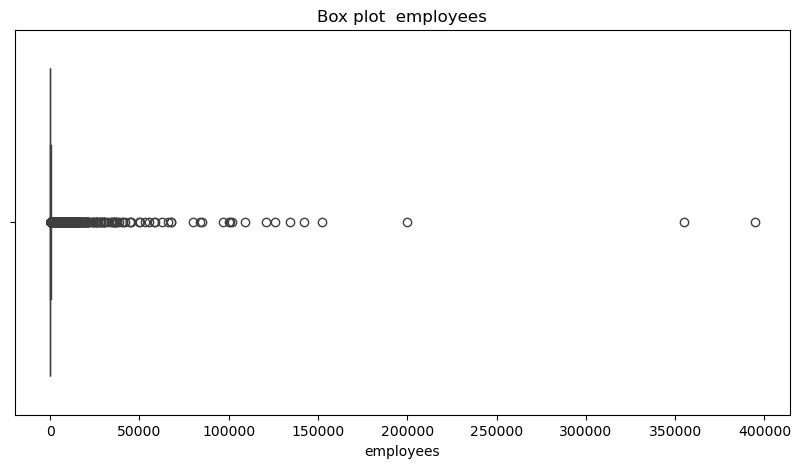

Columnas Numericas: revenues


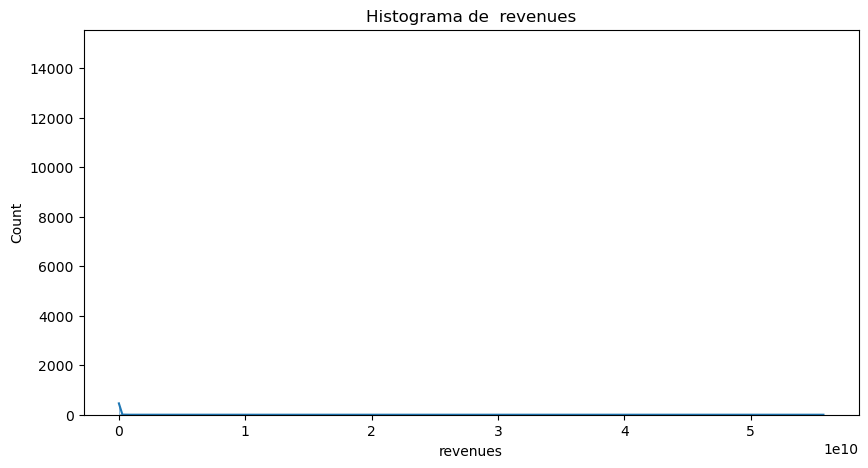

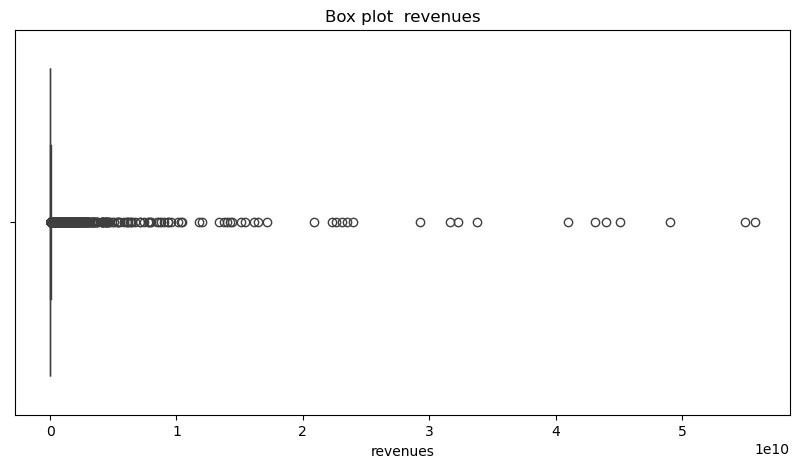

Columnas Numericas: foundation year


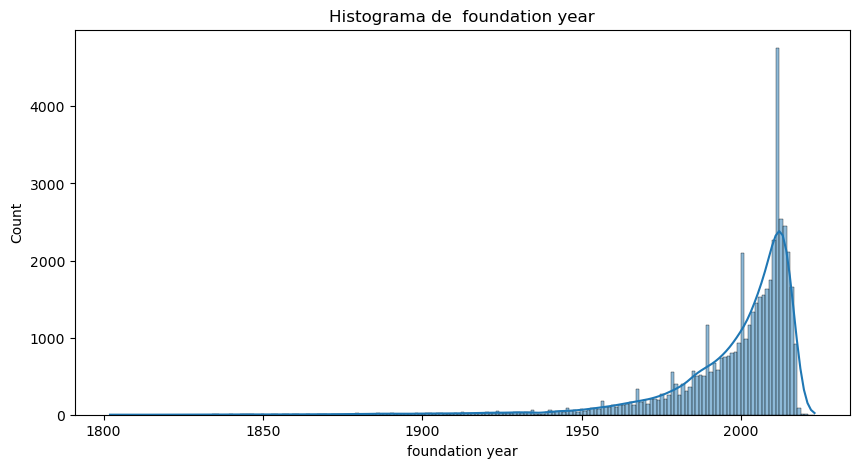

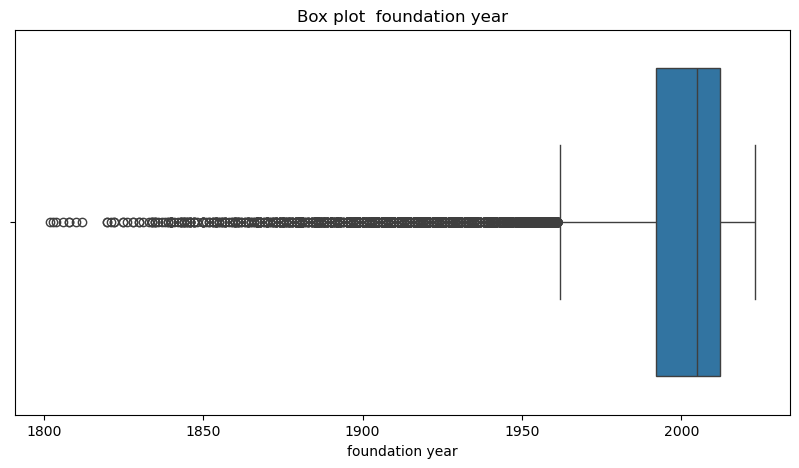

Columnas Numericas: LinkedIn followers


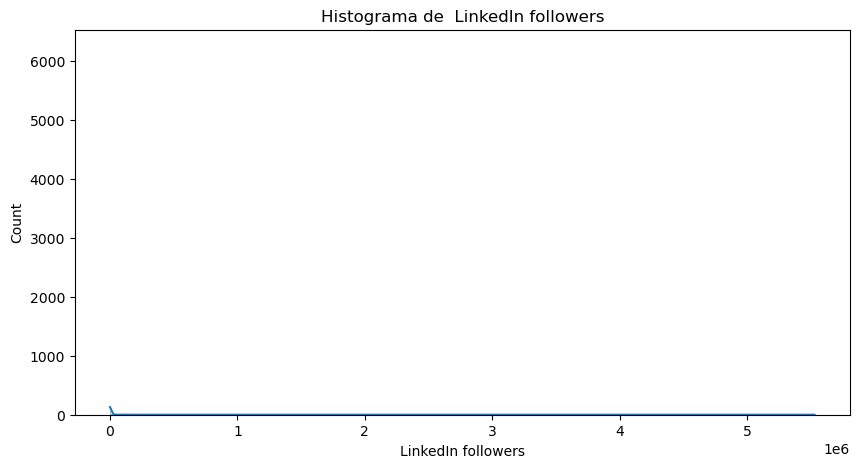

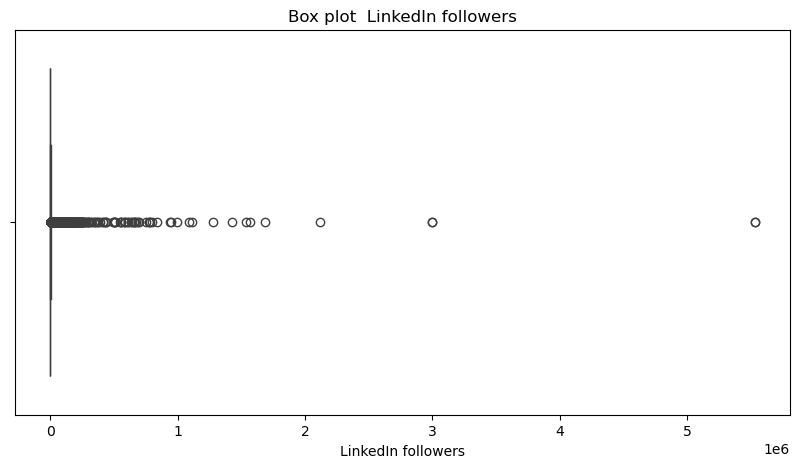

Columnas Numericas: X followers


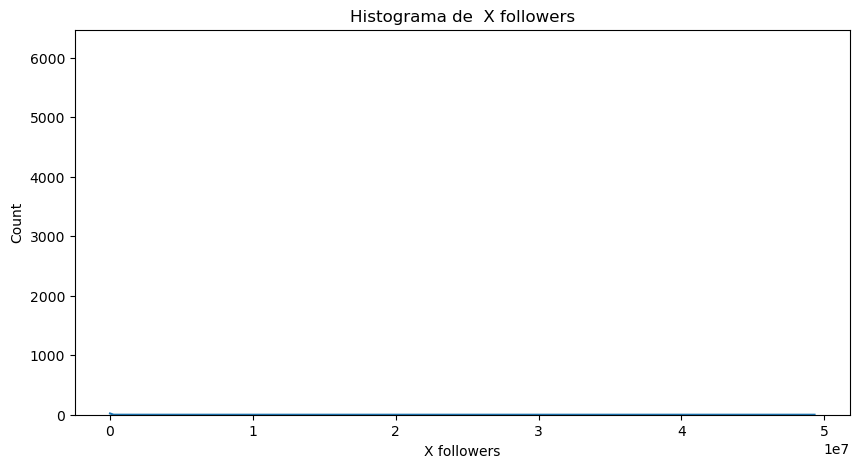

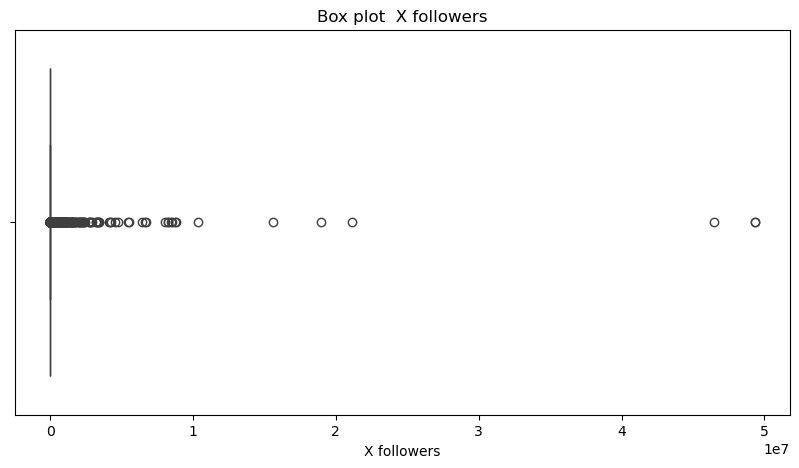

Columnas Numericas: tweets


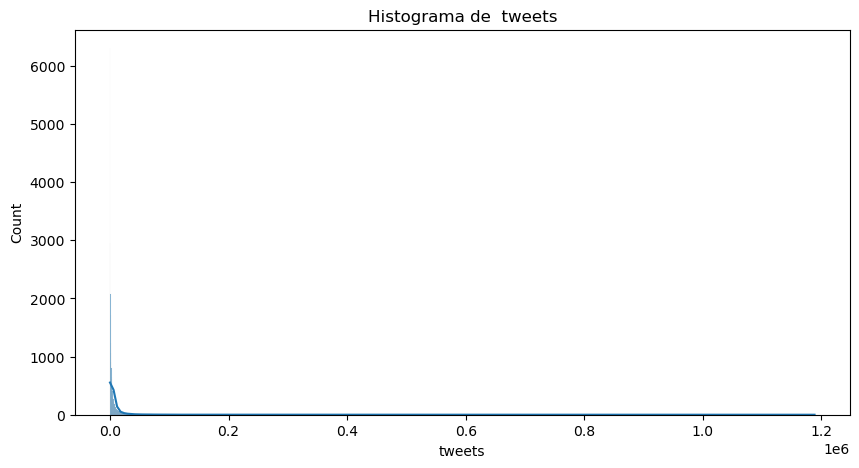

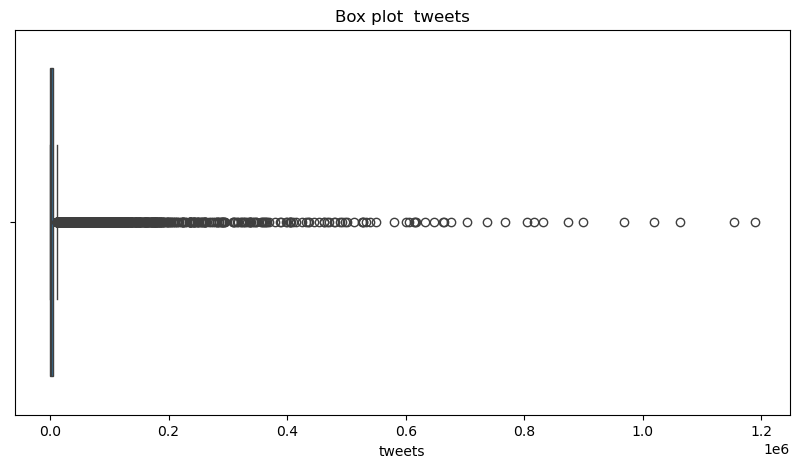

Columnas Numericas: CEO approval


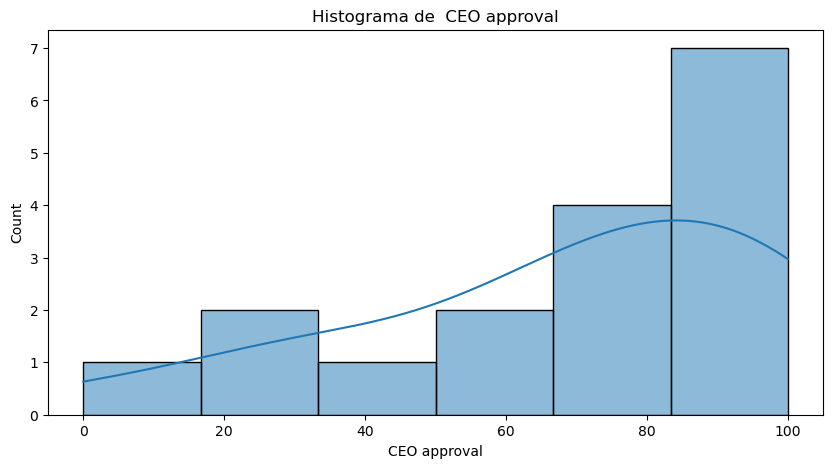

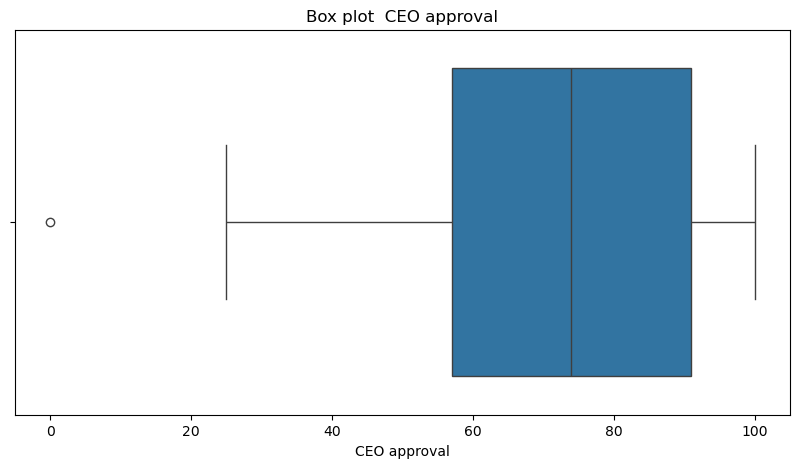

Columnas Numericas: ESG score


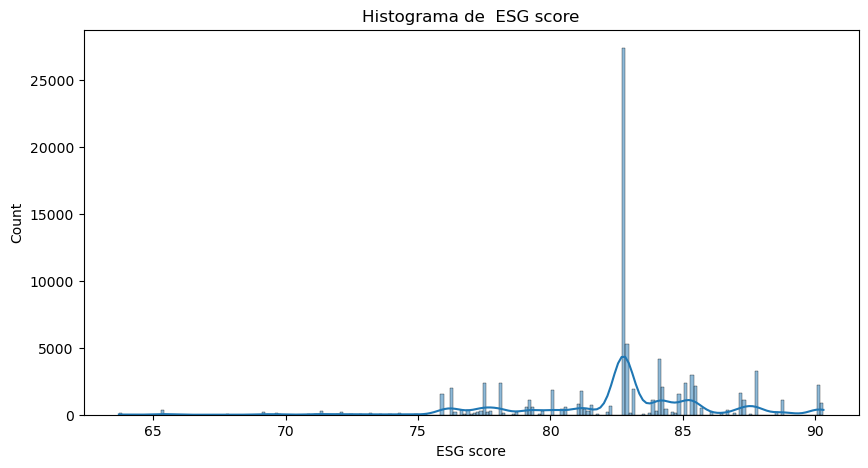

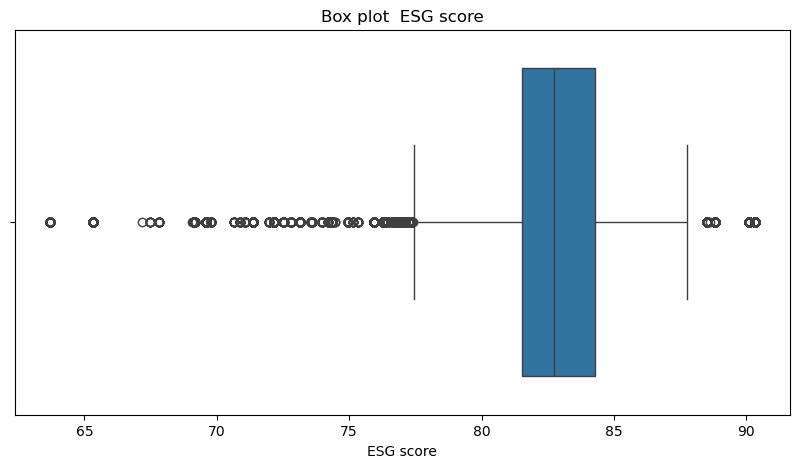

Columnas Numericas: environmental score (ESG)


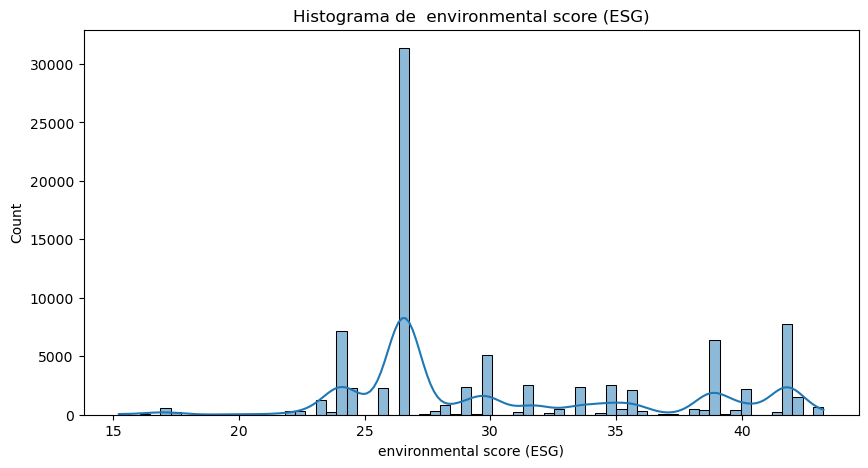

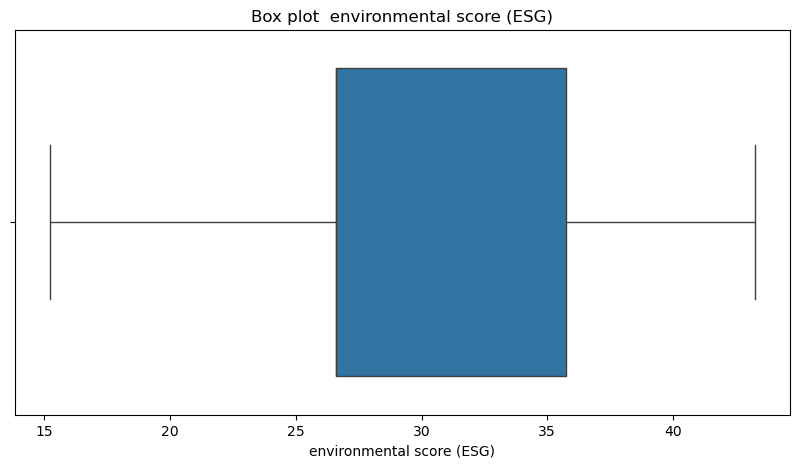

Columnas Numericas: social score (ESG)


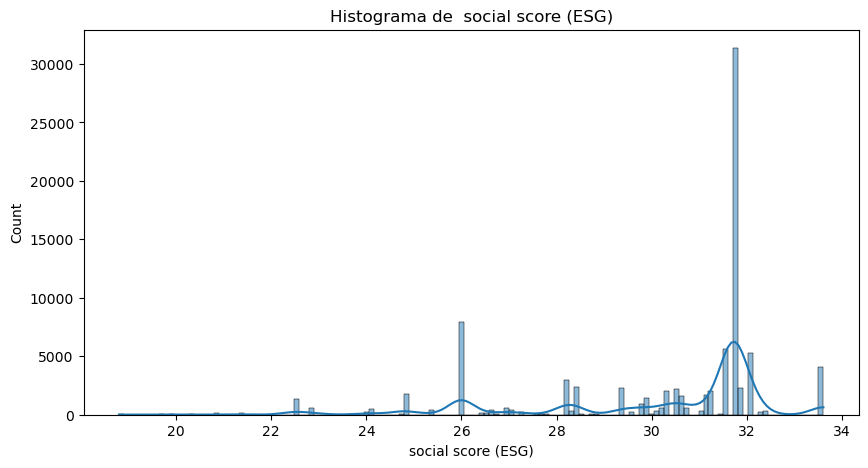

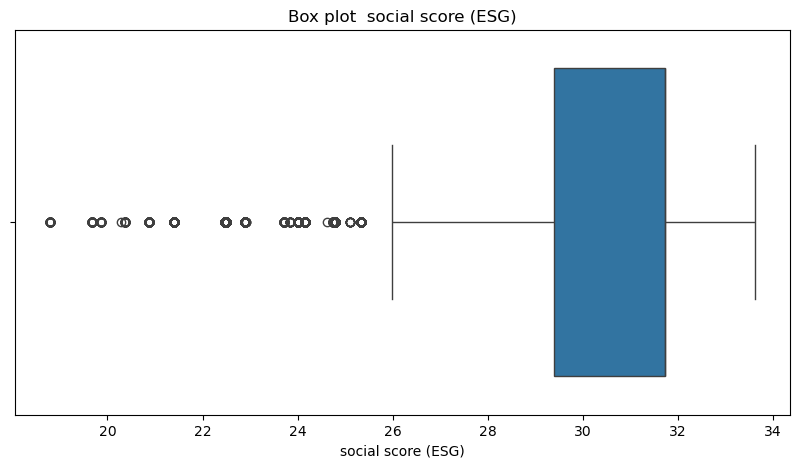

Columnas Numericas: governance score (ESG)


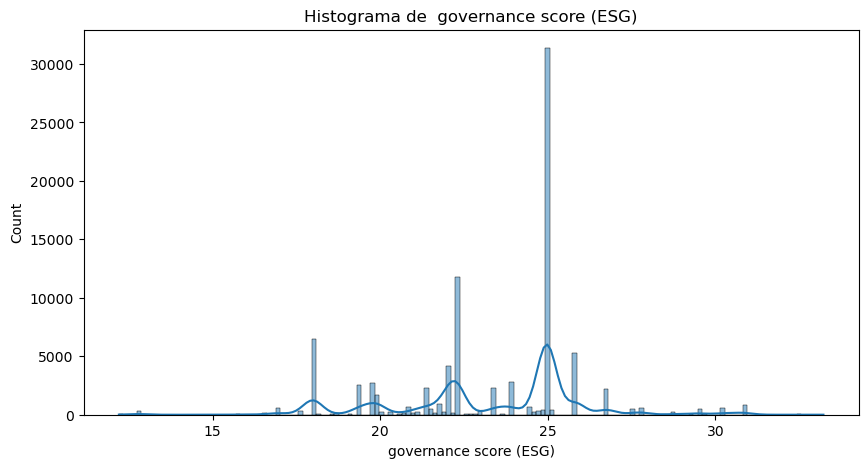

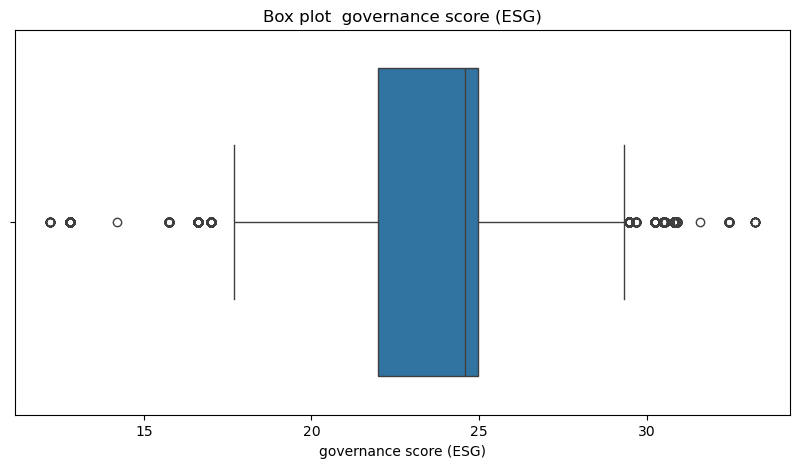

Columnnas Categoricas: company


company
ROJADIRECTA      6
Barcelona        5
Inc              5
AEC              5
ISM              4
Spain            4
Global           4
Lafuente         4
Energybiomasa    3
Viceversa        3
Name: count, dtype: int64

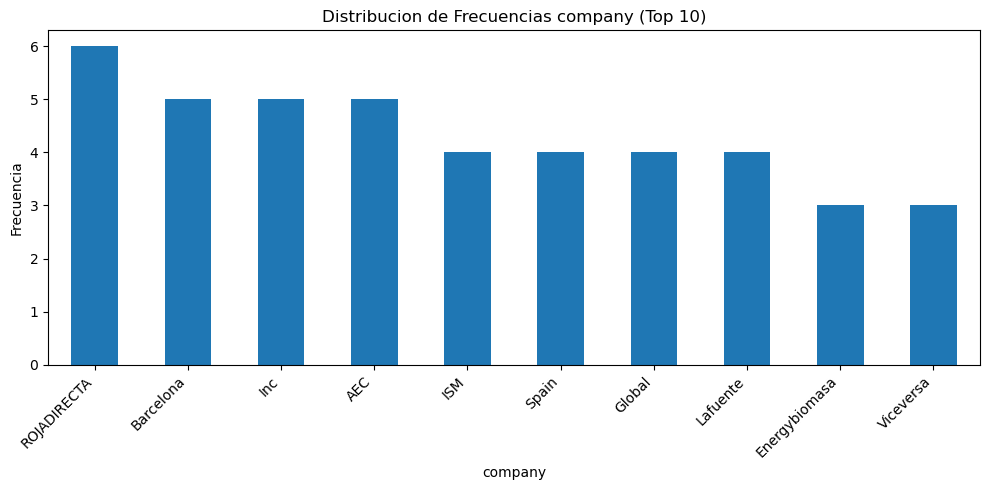

Columnnas Categoricas: city


city
Madrid       12024
Barcelona     8919
Bogotá        3204
Valencia      1831
Sevilla       1269
Zaragoza       889
Colombia       877
Medellín       805
Málaga         767
Bilbao         672
Name: count, dtype: int64

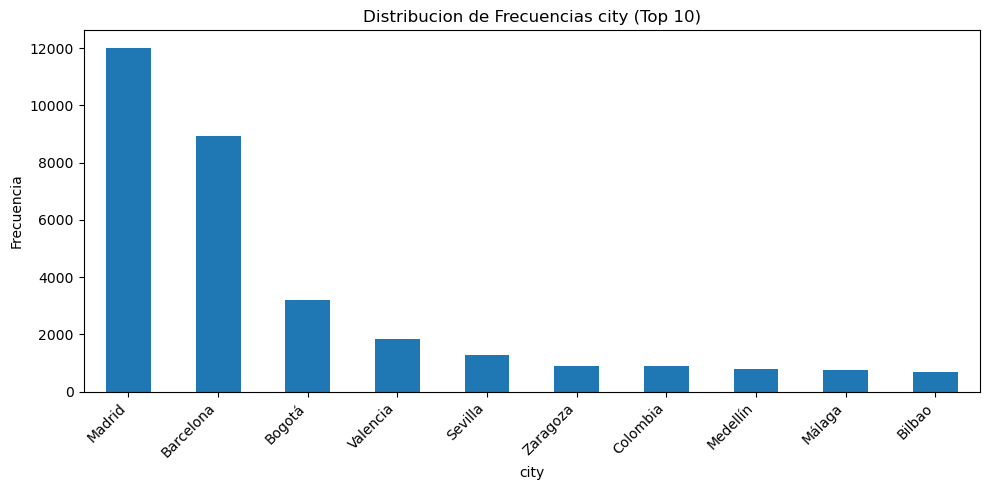

Columnnas Categoricas: website


website
https://www.ecopetrol.com.co      1
https://www.moviplast.es          1
http://www.tollpharma.es          1
http://grilledcheesestudio.com    1
https://eventospremium.es         1
https://grupo-ns.com              1
https://hoymarketing.com          1
https://aquabrava.com             1
https://www.mimamusic.org         1
https://www.jamnewyork.org        1
Name: count, dtype: int64

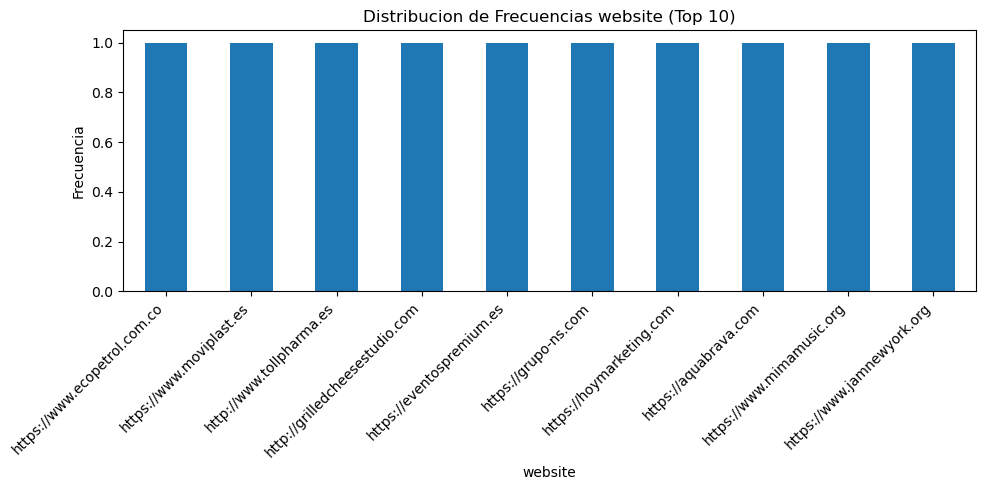

Columnnas Categoricas: sector


sector
Industrials               14820
Communication Services    12872
Consumer Discretionary    10143
Information Technology     5209
Financials                 4074
Health Care                3826
Consumer Staples           3340
Materials                  1187
Utilities                  1019
Real Estate                 873
Name: count, dtype: int64

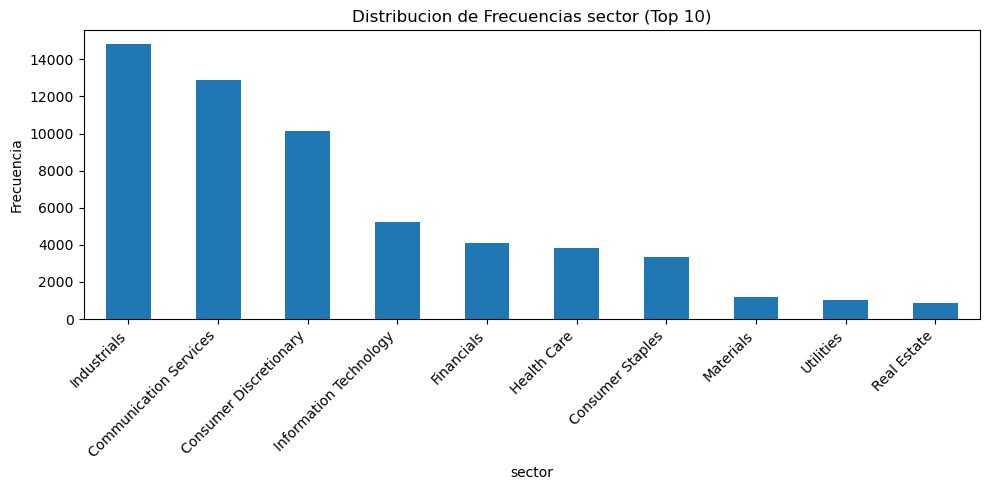

Columnnas Categoricas: industry


industry
Media                               7171
Professional Services               4709
Diversified Consumer Services       3422
Construction & Engineering          2624
Machinery                           2591
Commercial Services & Supplies      2542
Financial Services                  2524
Health Care Providers & Services    2508
Hotels, Restaurants & Leisure       2461
IT Services                         2362
Name: count, dtype: int64

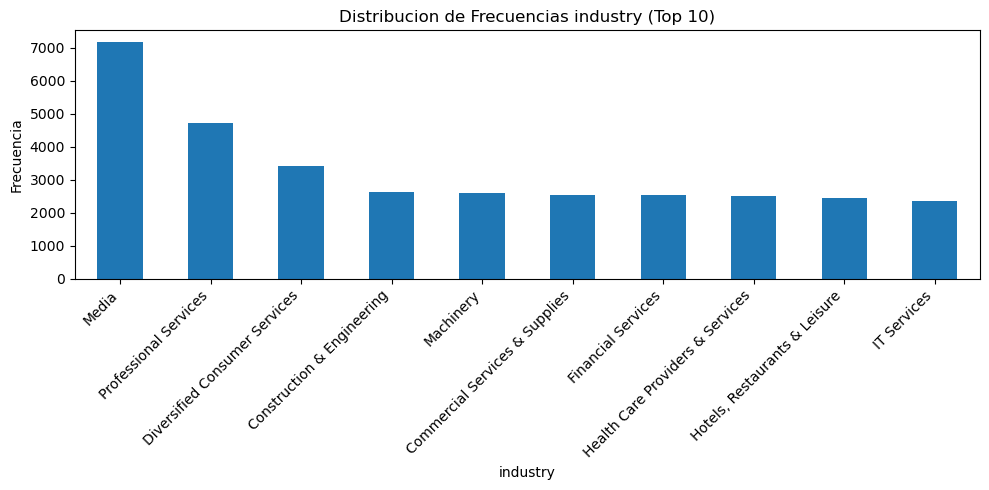

Columnnas Categoricas: LinkedIn link


LinkedIn link
https://www.linkedin.com/company/hm-hospitales          4
https://www.linkedin.com/company/grupo-navega           3
https://www.linkedin.com/company/europa-press           3
https://www.linkedin.com/company/quironsalud            3
https://www.linkedin.com/company/caixabank              3
https://www.linkedin.com/company/applus-laboratories    3
https://www.linkedin.com/company/9549790                3
https://www.linkedin.com/company/prosegur               3
https://www.linkedin.com/company/adade-econsulting      3
https://www.linkedin.com/company/corferias              2
Name: count, dtype: int64

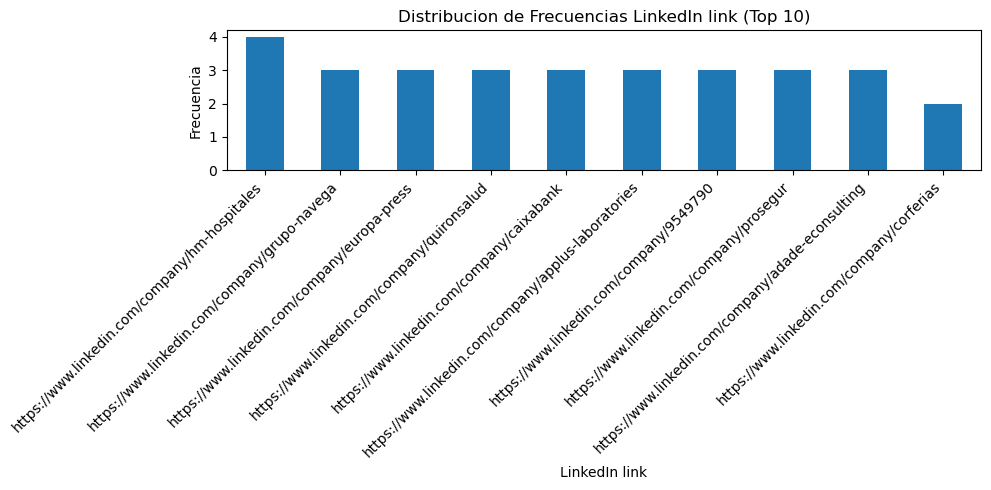

Columnnas Categoricas: X link


X link
https://x.com/prestashop         66
https://x.com/Plesk              14
https://x.com/LazadaID            8
https://x.com/selectra_es         6
https://x.com/QodeInteractive     5
https://x.com/TakeawayLanza       5
https://x.com/es                  5
https://x.com/shopify             5
https://x.com/quironsalud         4
https://x.com/seidor              4
Name: count, dtype: int64

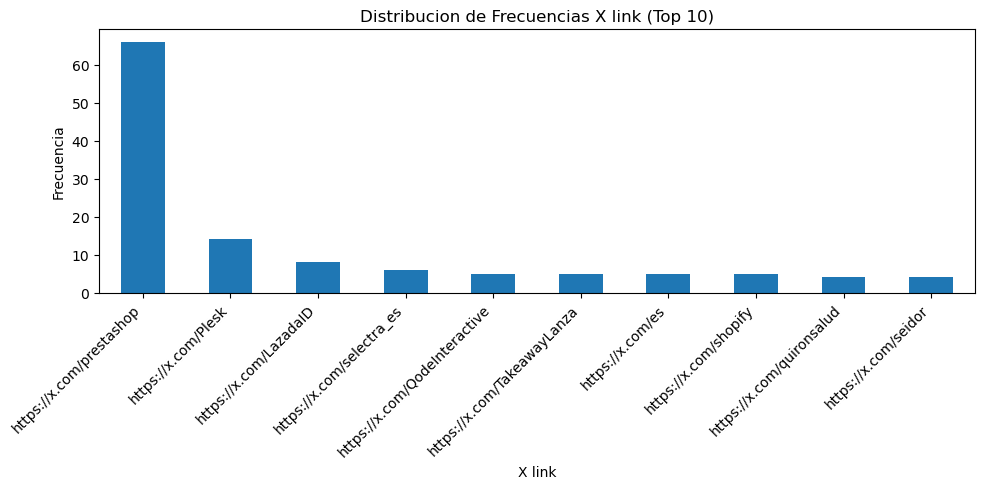

Columnnas Categoricas: X username


X username
CaixaBank              4
Trovit                 3
La Xarxa               3
Freepik                3
Óptica Óptima          3
.                      3
Alhambra de Granada    3
NH Hotels              3
CCI                    3
FC Barcelona           3
Name: count, dtype: int64

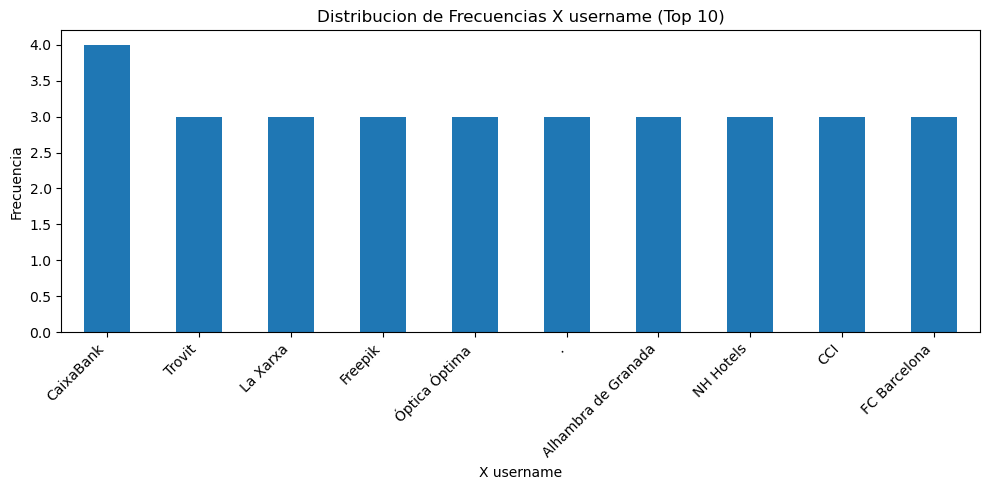

Columnnas Categoricas: Facebook link


Facebook link
https://www.facebook.com/pages        1589
https://www.facebook.com/pg            116
https://www.facebook.com/people         47
https://www.facebook.com/www            45
https://www.facebook.com/groups         31
https://www.facebook.com/Fundaci        21
https://www.facebook.com/fundacion      13
https://www.facebook.com/grupo          13
https://www.facebook.com/centro         10
https://www.facebook.com/Cl              8
Name: count, dtype: int64

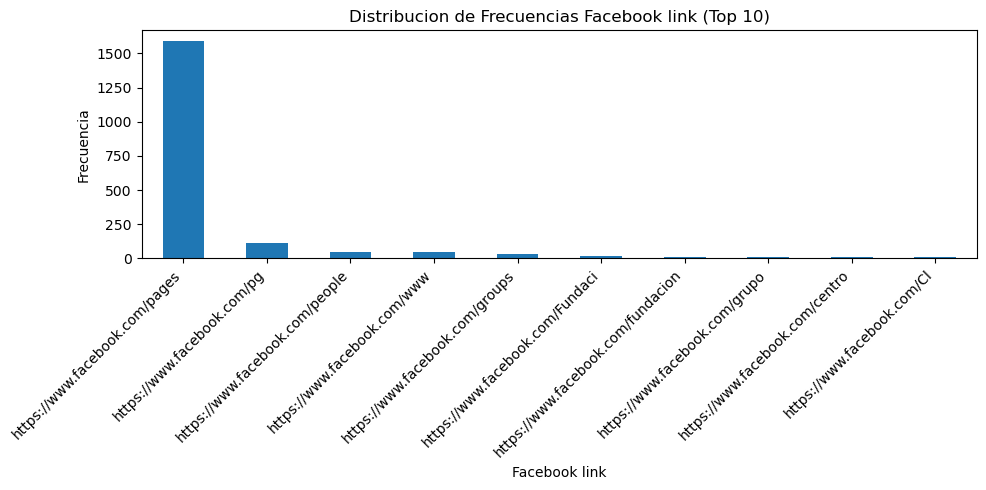

Columnnas Categoricas: Instagram link


Instagram link
https://www.instagram.com/ciber_investiga         7
https://www.instagram.com/shopify                 5
https://www.instagram.com/occidentseguros         3
https://www.instagram.com/petardoscm.oficial      3
https://www.instagram.com/fcbarcelona             3
https://www.instagram.com/selectra_esp            3
https://www.instagram.com/ayesaoficial            3
https://www.instagram.com/grupatlantida           3
https://www.instagram.com/floristeria_telerosa    2
https://www.instagram.com/sevilla_ros             2
Name: count, dtype: int64

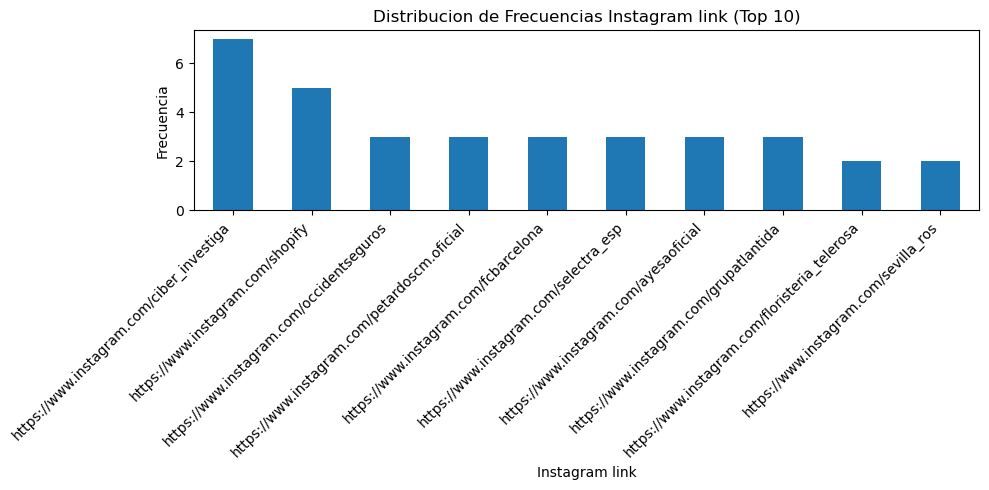

Columnnas Categoricas: CEO


CEO
Cesar Gonzalez-Bueno Mayer Wittgenstein    2
Maria Lorena Gutierrez Botero              2
Javier Martinez Ojinaga                    2
Rafael Martín De Bustamante Vega           2
Luis Felipe Rivera Garcia                  1
Pedro Vinolas Serra                        1
Jose Antonio Martinez Aguilar              1
Juan Luis Lopez Garcia                     1
Miguel Angel Tapiador Silanes              1
Eduardo Baviera Sabater                    1
Name: count, dtype: int64

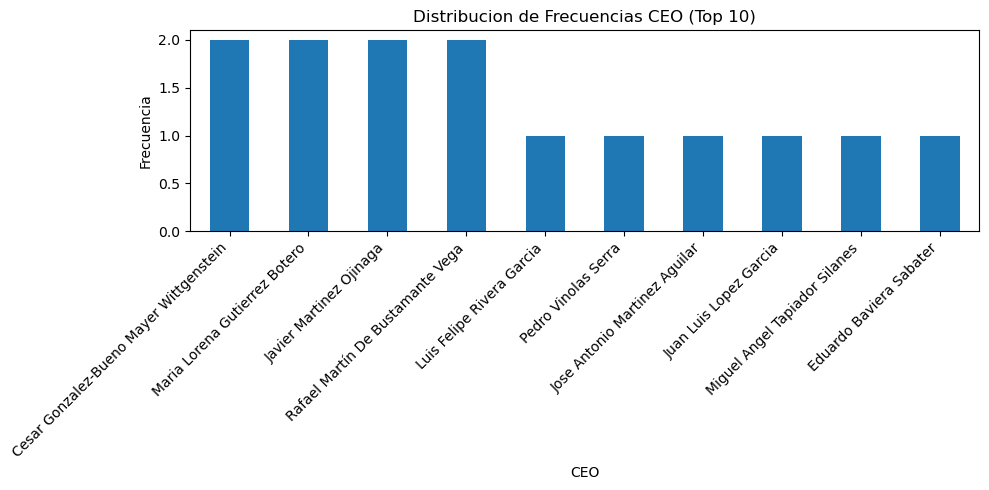

Columnnas Categoricas: stack


stack
google analytics                               11817
google fonts                                    8511
google analytics, google fonts                  7060
google analytics, google fonts, woocommerce     4809
google fonts, woocommerce                       3558
google fonts, google analytics                  3198
google analytics, woocommerce                   2414
woocommerce                                     2376
woocommerce, google fonts, google analytics     2027
prestashop                                      1758
Name: count, dtype: int64

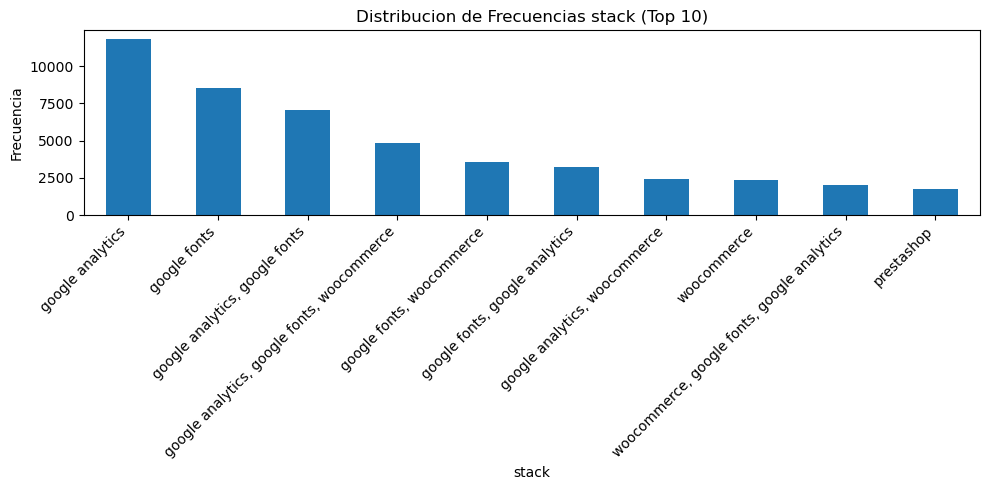

Columnnas Categoricas: alternate websites


alternate websites
https://panama.grupobancolombia.com                                                1
https://ecommerce.notejido.com                                                     1
https://net2learn.netlanguages.com                                                 1
http://www.madrimasd.org                                                           1
https://www.mubea.com                                                              1
https://retail.vivendex.com                                                        1
https://malaga.cgac.es                                                             1
https://maratonradio.valenciaplaza.com, https://999plazaradio.valenciaplaza.com    1
https://es.e-noticies.cat                                                          1
http://greenbit.es                                                                 1
Name: count, dtype: int64

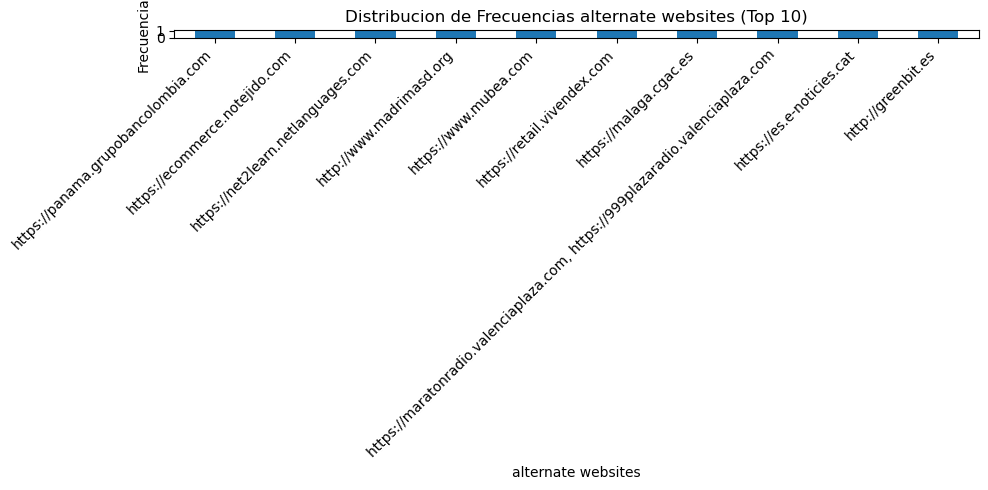

Columnnas Categoricas: talking points


talking points
Just a moment...                                                                                                                                               60
Attention Required! | Cloudflare                                                                                                                               32
Just at the moment...                                                                                                                                          25
Just at times ...                                                                                                                                              19
This text is shown in the search engine list.                                                                                                                  17
Error 404, Page not found                                                                                                                                      17
Just in time.

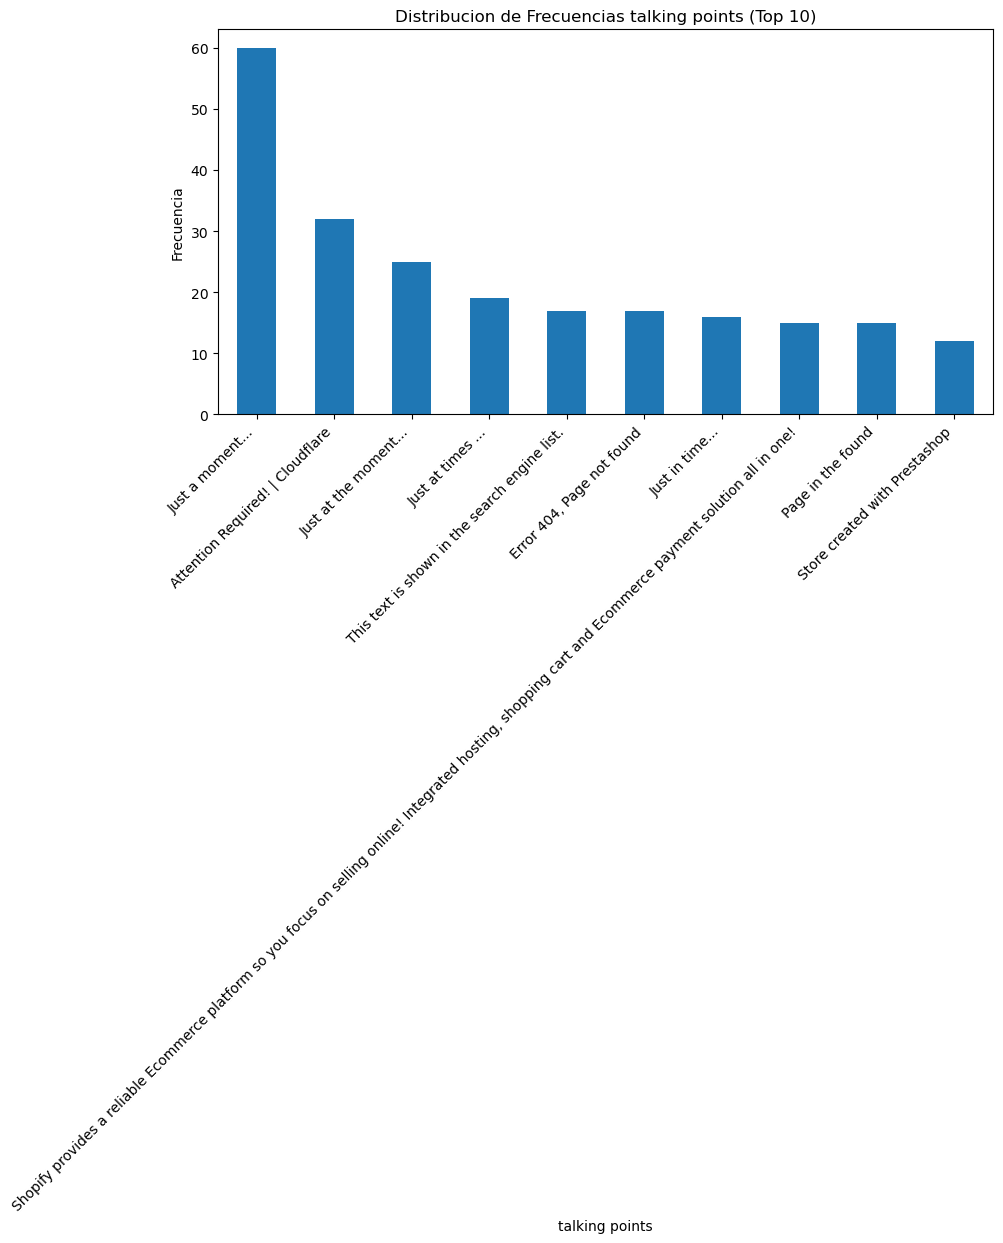

In [14]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Analiza columnas numericas
for col in numerical_cols:
    print(f"Columnas Numericas: {col}")
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de  {col}')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot  {col}')
    plt.show()

# Analiza columnas categoricas
for col in categorical_cols:
    print(f"Columnnas Categoricas: {col}")
    display(df[col].value_counts().head(10)) # Display top 10 for brevity
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(10).plot(kind='bar') # Plot top 10
    plt.title(f'Distribucion de Frecuencias {col} (Top 10)')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

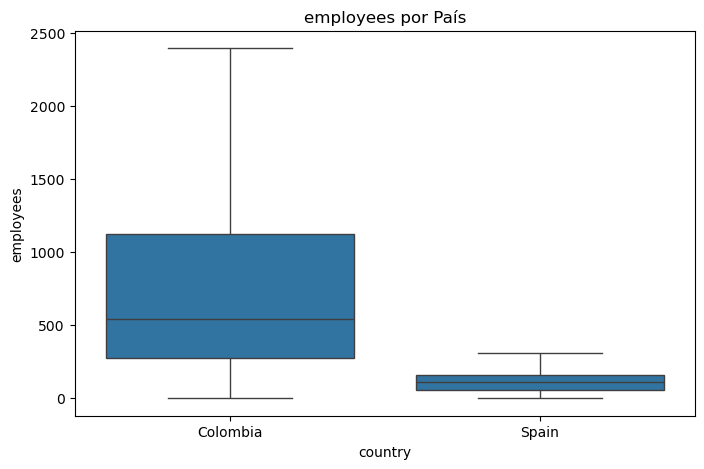

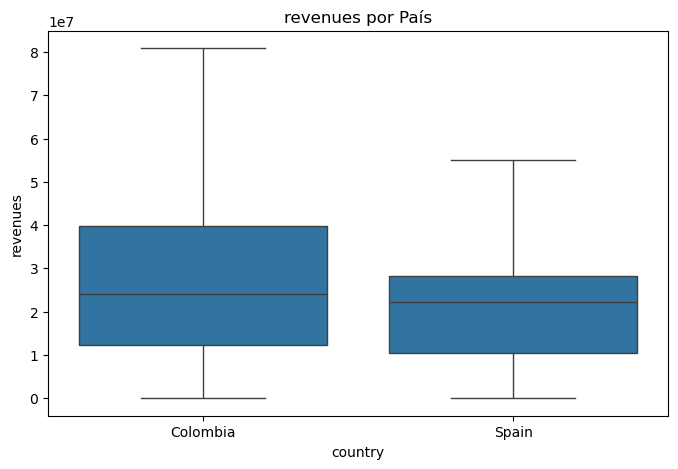

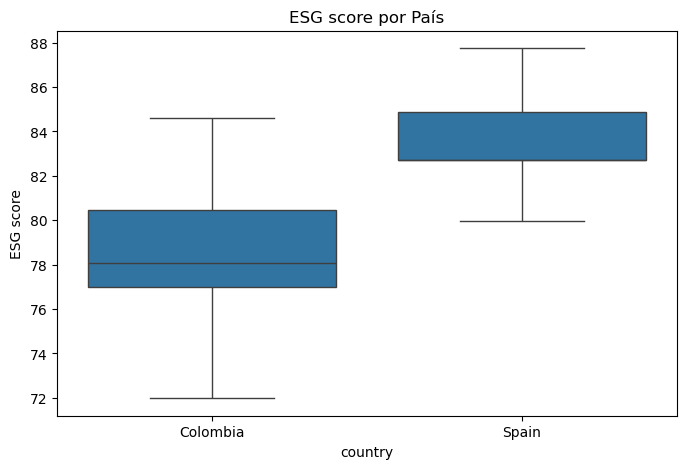

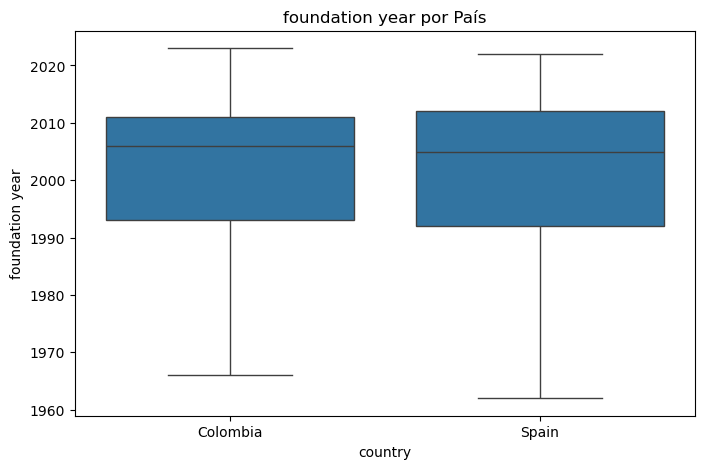

In [15]:
# 3. Comparaciones por país (boxplots)
for col in ['employees', 'revenues', 'ESG score', 'foundation year']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='country', y=col, showfliers=False)
    plt.title(f'{col} por País')
    plt.show()

### Explicabilidad

* Las variables "revenues" y "employees" muestran distribuciones altamente sesgadas, lo que sugiere que podría ser útil aplicar transformaciones logarítmicas o analizar subgrupos para un mejor entendimiento.
* La puntuación ESG parece tener una distribución más normalizada, con la mayoría de las empresas agrupadas en un rango medio-alto, lo que podría indicar un estándar generalizado en esta métrica.

* Diferencias entre países: España tiende a mostrar medianas más altas en escala (employees, revenues, ESG), mientras Colombia destaca en juventud (foundation year). Esto alinea con contextos económicos: España (UE, madura) vs. Colombia (emergente, volátil).
* Limitaciones: Con solo 2 países, los boxplots son binarios; análisis estadísticos (ej. t-test) podrían confirmar diferencias significativas. Datos faltantes (ej. employees NaN en head) podrían sesgar, y el dataset parece enfocado en sectores específicos (Energía, Financiero).


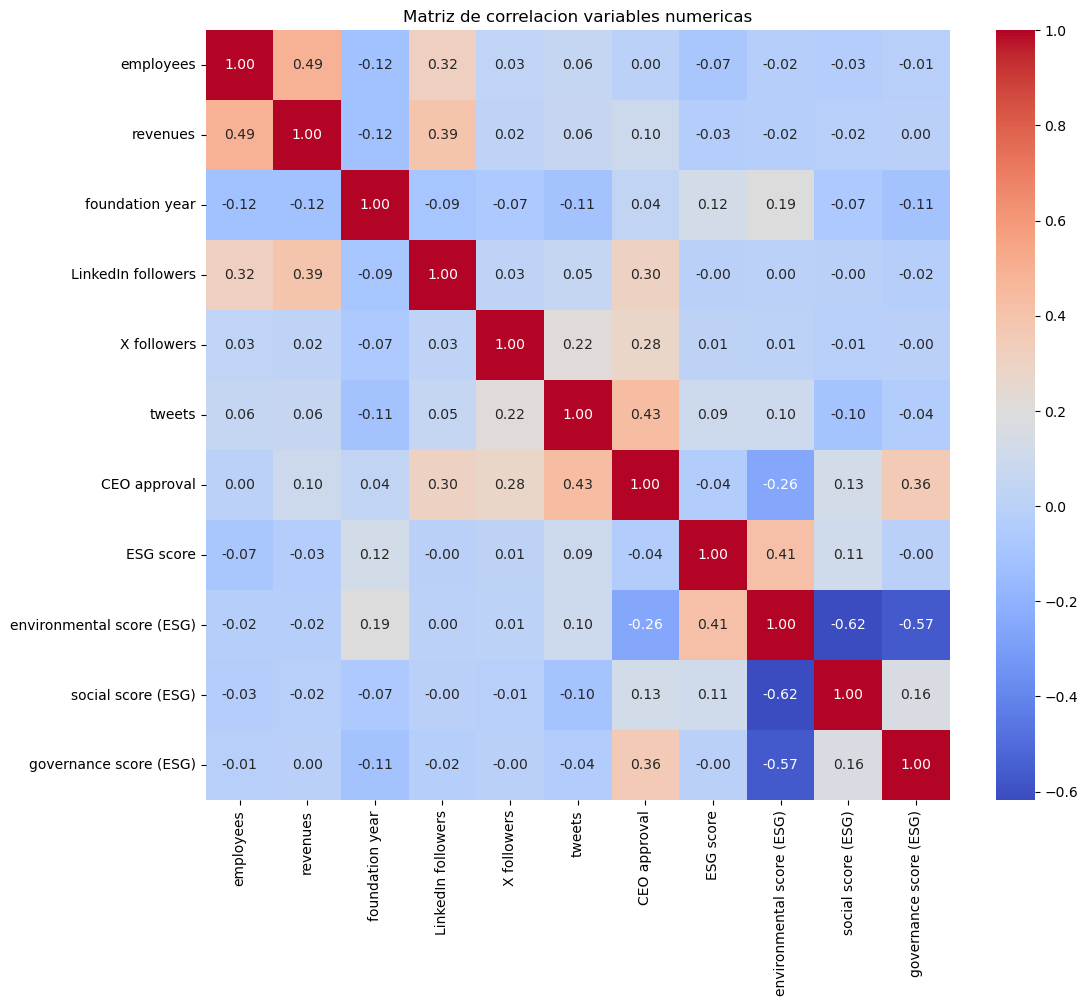

In [16]:
numerical_cols = df.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlacion variables numericas')
plt.show()

### Correlaciones
* employees–revenues: 0.49 (moderada positiva). Existe una correlación positiva moderada, lo que sugiere que a mayor número de empleados, tienden a haber mayores ingresos, aunque no de manera perfectamente lineal.
* evenues y LinkedIn followers (0.39):Correlación positiva moderada, indicando que las empresas con mayores ingresos tienden a tener más seguidores en LinkedIn, posiblemente reflejando una mayor presencia o reputación.
* CEO approval y ESG score (0.43):Correlación positiva moderada, sugiriendo que una mayor aprobación del CEO está asociada con mejores puntajes ESG, lo que podría indicar que el liderazgo influye en la percepción de sostenibilidad.
* Redes sociales y tweets: "X followers", "LinkedIn followers" y "tweets" tienen correlaciones generalmente bajas con otras variables, excepto entre sí (e.g., 0.22 entre "X followers" y "tweets"), sugiriendo que la actividad en redes sociales no está fuertemente vinculada a métricas como ingresos o ESG.

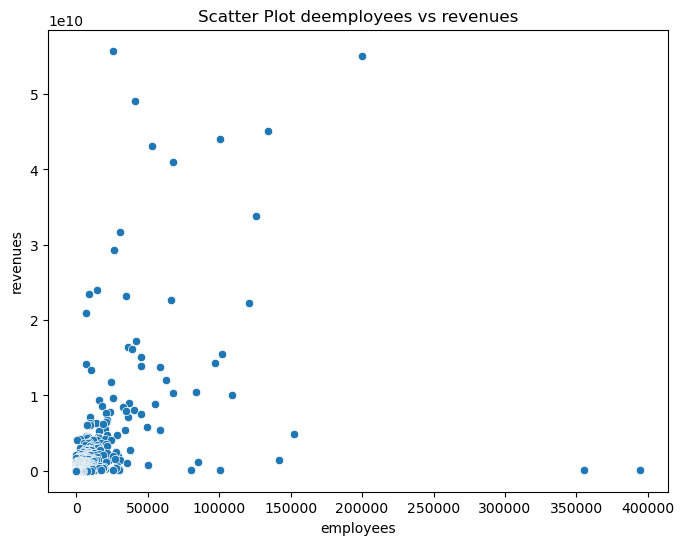

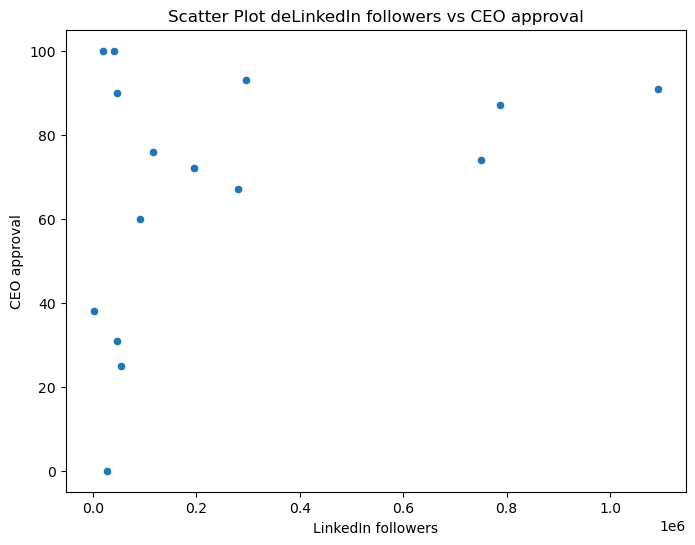

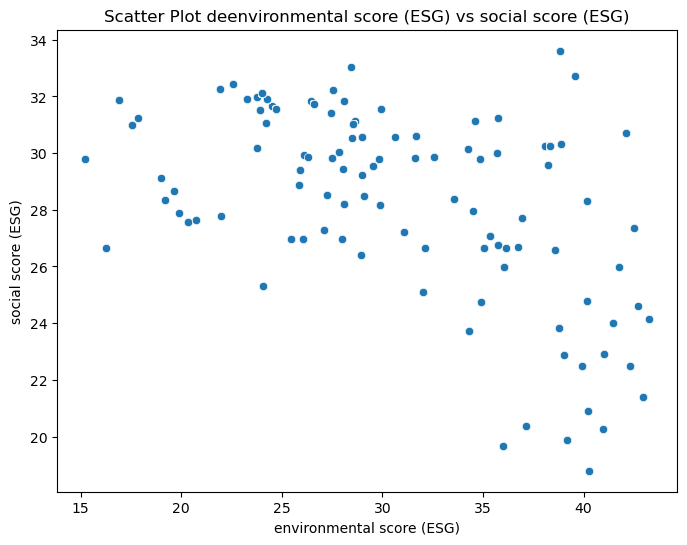

In [17]:
# seleccion de pares de correlacion 
pares = [
    ('employees', 'revenues'),
    ('LinkedIn followers', 'CEO approval'),
    ('environmental score (ESG)', 'social score (ESG)')
]

for pair in pares:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1])
    plt.title(f'Scatter Plot de{pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

* Patrones globales: Los gráficos refuerzan temas previos: distribuciones sesgadas en tamaño/ingresos, correlaciones moderadas en métricas de desempeño, y trade-offs en ESG. No hay correlaciones fuertes evidentes, lo que indica complejidad multifactorial en los datos.
* Limitaciones: Los scatters muestran heterocedasticidad (varianza no constante), sugiriendo necesidad de transformaciones o modelos no lineales. Outliers recurrentes (e.g., en ingresos) podrían ser influyentes.

In [18]:
# Select pairs of categorical variables
categorical_pairs = [
    ('country', 'sector'),
    ('company type', 'revenue type')
]

for pair in categorical_pairs:
    print(f"Contingency Table for {pair[0]} and {pair[1]}")
    contingency_table = pd.crosstab(df[pair[0]], df[pair[1]])
    display(contingency_table)

Contingency Table for country and sector


sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
country,,,,,,,,,,,
Colombia,1304,884,213,96,519,343,1842,752,111,77,73
Spain,11568,9259,3127,160,3555,3483,12978,4457,1076,796,946


Contingency Table for company type and revenue type


revenue type,actual,estimate
company type,,
private,26,86824
public,105,0


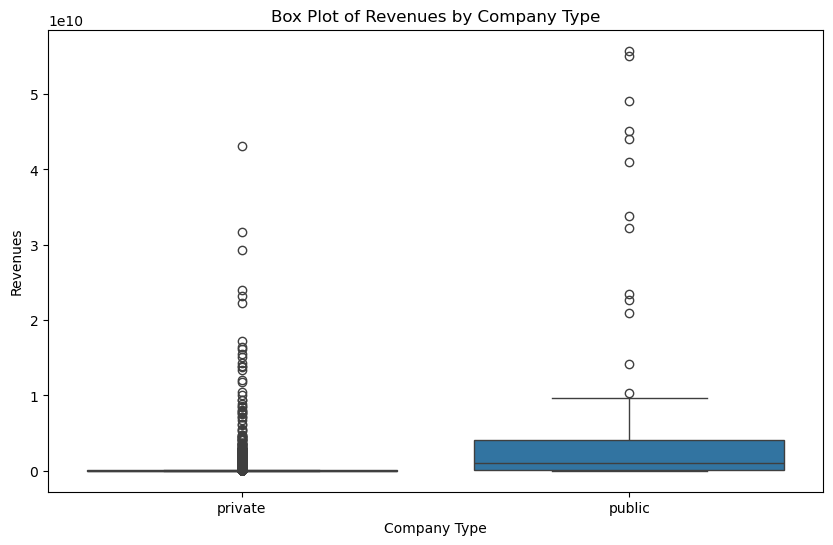

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company type', y='revenues')
plt.title('Box Plot of Revenues by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Revenues')
plt.show()

 ## Outliers:

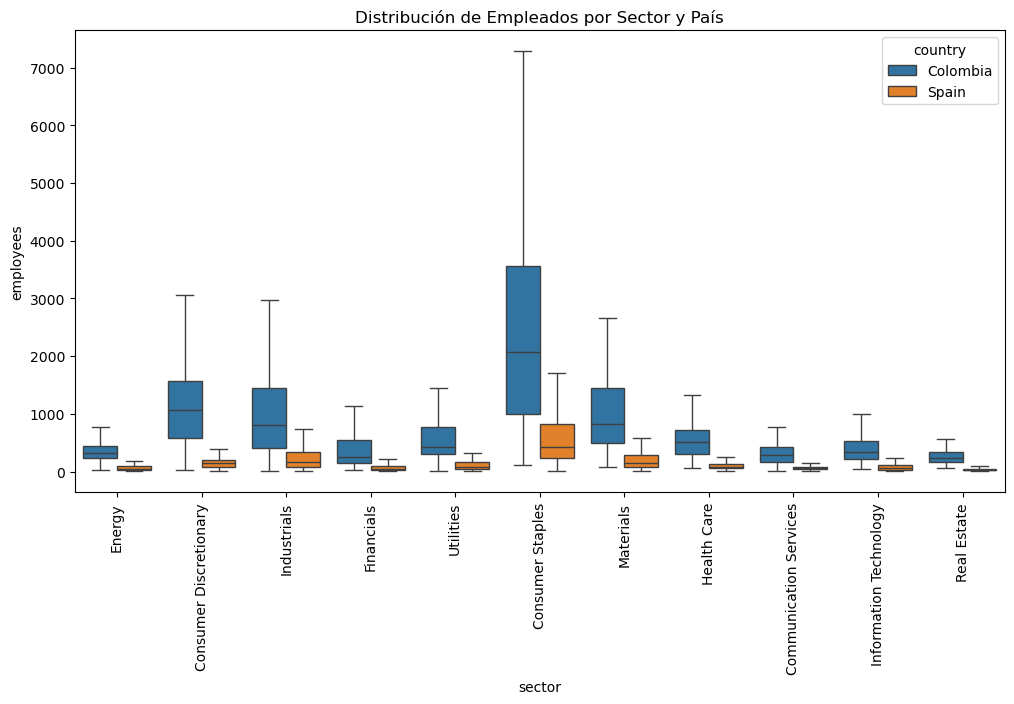

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sector', y='employees', hue='country', showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribución de Empleados por Sector y País')
plt.show()


 *Colombia presenta medianas y dispersiones superiores en la mayoría de sectores, sugiriendo menos empresas pero de mayor tamaño; España muestra mayor concentración de PYMES.
* Sesgo por outliers: Sectores como Consumer Staples e Industrials en Colombia exhiben colas muy largas; conviene complementar con medidas robustas (mediana, IQR) y, si es posible, normalizar por conteos.
* Representatividad: España tiene muchas más empresas en el dataset; aun así, sus tamaños medianos son menores en la mayoría de sectores.
* Implicación: Para comparar productividad/ingresos, usar transformaciones log y contrastes por mediana; para modelar empleo, incluir interacción país–sector.
* Empresas colombianas tienden a ser más grandes en casi todos los sectores; las excepciones claras son Communication Services y Energy, donde España lidera en mediana.


se realizara el siguinte test comparando:

* Grupo A (no_outliers): Empresas con ≤10,000 empleados (media más baja, sin extremos).
* Grupo B (with_outliers): Todo el dataset (incluye outliers, media más alta).
* Hipótesis nula (H0): Las medias de ambos grupos son iguales (outliers no impactan).
* Hipótesis alternativa (H1): Las medias difieren (outliers impactan).

Es importante aclarar que realizara el umbral de 10000 empleados  Basado en las estadísticas del dataset, el 99% de las empresas tienen menos de 10,000 empleados. Valores por encima de esto (solo ~0.14% de las filas) son "extremos" y pueden distorsionar resultados, como inflar la media (e.g., sin outliers, la media bajaría drásticamente).  

In [21]:
outliers = df[df['employees'] > 10000]

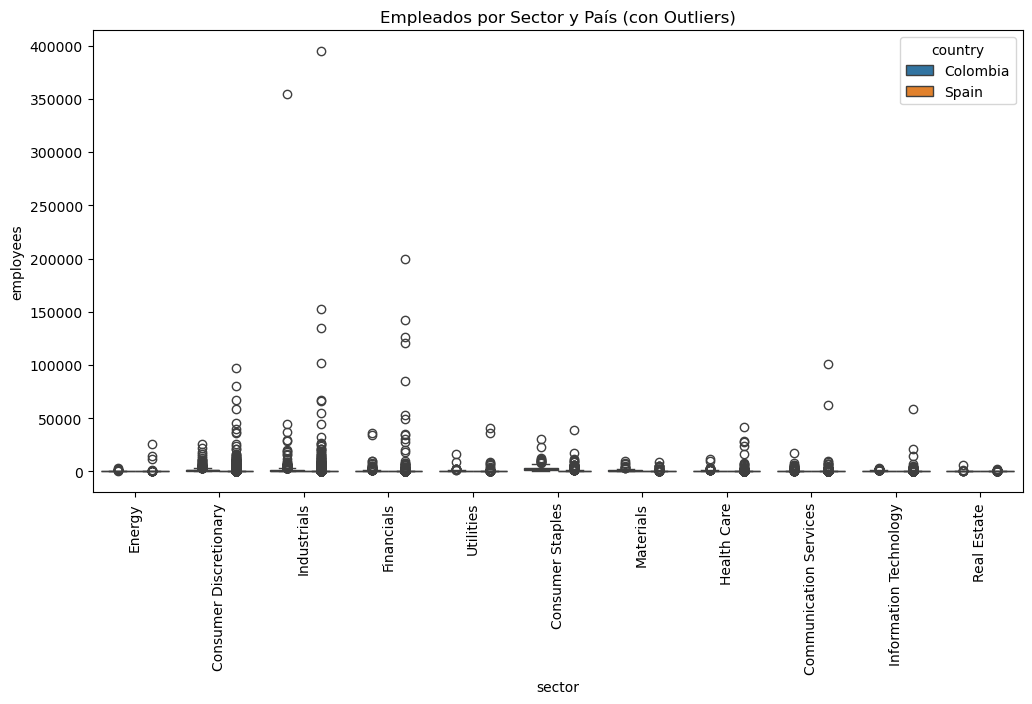

In [22]:
# Visualización: Boxplot por sector y país (con outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sector', y='employees', hue='country', showfliers=True)
plt.title('Empleados por Sector y País (con Outliers)')
plt.xticks(rotation=90)
plt.show()

Diferenciación por país:

Colombia (azul): Predominan en sectores como Energy (outlier ~100,000), Industrials (múltiples puntos hasta ~350,000), Financials (~150,000) y Utilities (~100,000). Menos presencia en sectores como Real Estate o Information Technology, donde los puntos son escasos y bajos.
España (naranja): Muestra outliers más altos en Industrials (~400,000), Financials (~100,000-150,000) y Consumer Staples (~100,000). En sectores como Energy o Health Care, los puntos son más bajos y menos frecuentes comparados con Colombia.

### VALORES PERDIDOS (Missing)

<Axes: >

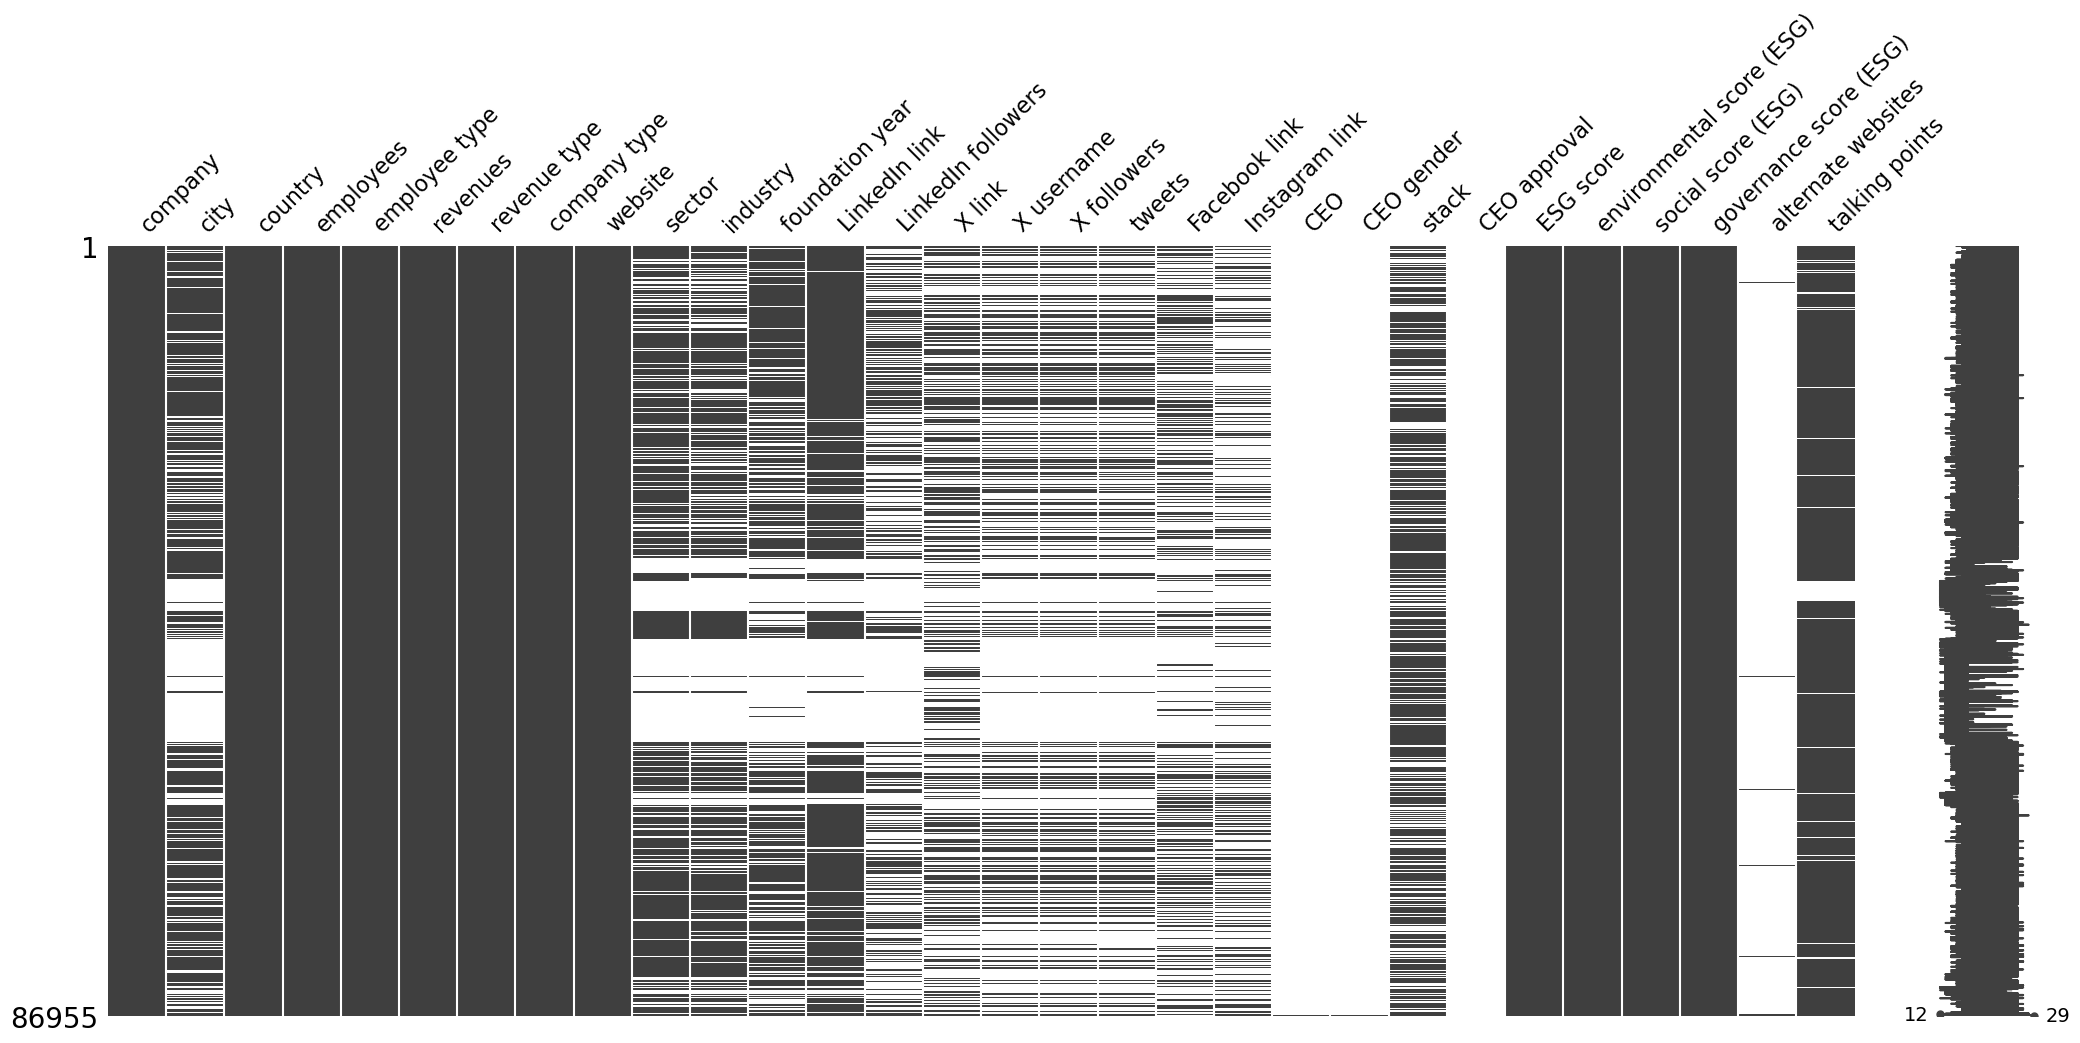

In [23]:
import missingno as msno   
# Plot correlation heatmap of missingness
msno.matrix(df.sort_values(by='employees'))

In [24]:
# 1. Calculo de porcentajes de valores Missiog
missing_percentage = df.isnull().sum() / len(df) * 100

# 2. identificar valores con mas 50% de valores missing
high_missing_cols = missing_percentage[missing_percentage > 50].index.tolist()
print("\n Columas con mas de 50 por ciento de valores Missing:")
print(high_missing_cols)

# 3. eliminacion de columnas
df_cleaned = df.drop(columns=high_missing_cols)
print(f"\n Eliminadas  {len(high_missing_cols)} Columnas con de 50% de valores Misss¡ing.")

# 4. seleccion de variables categoricas y numericas para imputacion
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns
categorical_cols = df_cleaned.select_dtypes(include=['object','category']).columns

# imputacion de variables numericas
for col in numerical_cols:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median() #imputacion por la media
        df_cleaned[col].fillna(median_val, inplace=True)

# Imputacion de variables categoricas
for col in categorical_cols:
    if df_cleaned[col].isnull().any():
        mode_val = df_cleaned[col].mode()[0] 
        df_cleaned[col].fillna(mode_val, inplace=True)


# 5. Verificacion y resultado
df_cleaned.isnull().sum()



 Columas con mas de 50 por ciento de valores Missing:
['LinkedIn followers', 'X link', 'X username', 'X followers', 'tweets', 'Facebook link', 'Instagram link', 'CEO', 'CEO gender', 'CEO approval', 'alternate websites']

 Eliminadas  11 Columnas con de 50% de valores Misss¡ing.


company                      0
city                         0
country                      0
employees                    0
employee type                0
revenues                     0
revenue type                 0
company type                 0
website                      0
sector                       0
industry                     0
foundation year              0
LinkedIn link                0
stack                        0
ESG score                    0
environmental score (ESG)    0
social score (ESG)           0
governance score (ESG)       0
talking points               0
dtype: int64

### VALORES ATIPICOS

In [25]:
df_cleaned.select_dtypes(include=np.number).apply(lambda x: x.skew())

employees                    86.576260
revenues                     62.622256
foundation year              -4.198027
ESG score                    -0.959038
environmental score (ESG)     0.602140
social score (ESG)           -1.384906
governance score (ESG)       -0.421294
dtype: float64

Column: employees, Outliers Count: 11869
Column: revenues, Outliers Count: 8689
Column: foundation year, Outliers Count: 31249
Column: ESG score, Outliers Count: 11570
Column: environmental score (ESG), Outliers Count: 0
Column: social score (ESG), Outliers Count: 5461
Column: governance score (ESG), Outliers Count: 3161

Los valores atípicos se han limitado en columnas numéricas.

Estadísticas descriptivas tras la limitación:


,employees,revenues,foundation year,ESG score,environmental score (ESG),social score (ESG),governance score (ESG)
count,86955.000000,8.695500e+04,86955.000000,86955.000000,86955.000000,86955.000000,86955.000000
mean,157.794089,2.400179e+07,2004.737226,82.817462,30.549175,30.346286,23.278365
std,124.619988,1.759717e+07,3.924983,2.956317,6.340295,2.279412,2.700747
min,1.000000,8.000000e+00,1998.500000,77.445044,15.229753,25.882753,17.517117
25%,61.000000,1.063043e+07,2003.000000,81.536390,26.587875,29.389399,21.990730
50%,130.000000,2.230149e+07,2005.000000,82.722496,26.587875,31.727163,24.585754
75%,199.000000,3.075707e+07,2006.000000,84.263954,35.739710,31.727163,24.973139
max,406.000000,6.094703e+07,2010.500000,88.355300,43.247356,33.614727,29.446753


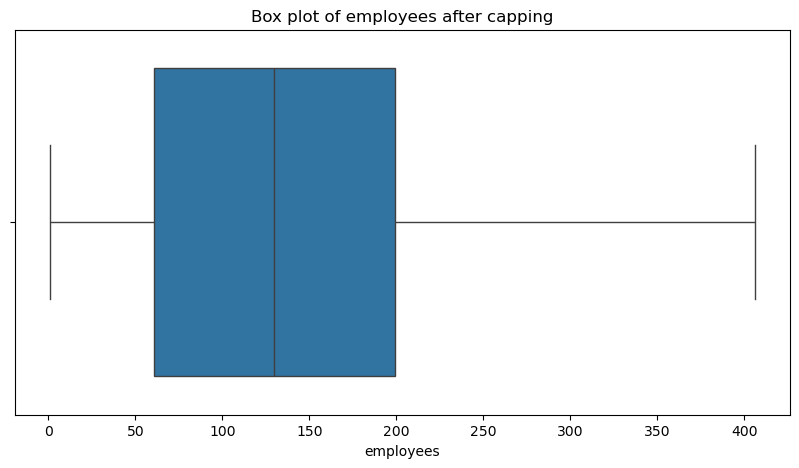

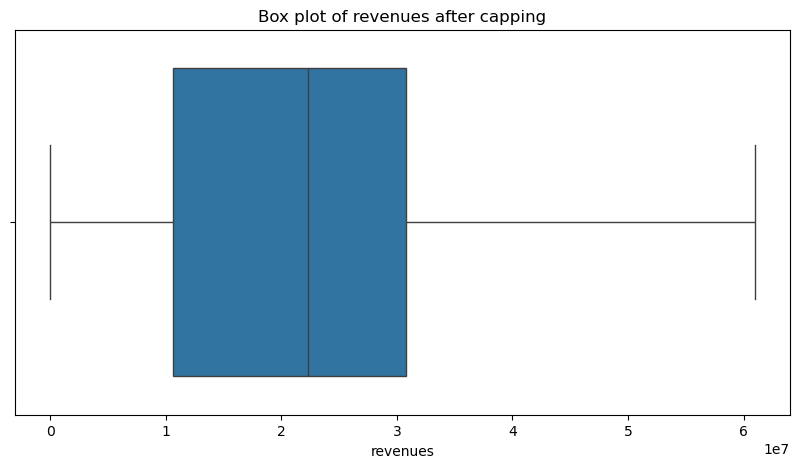

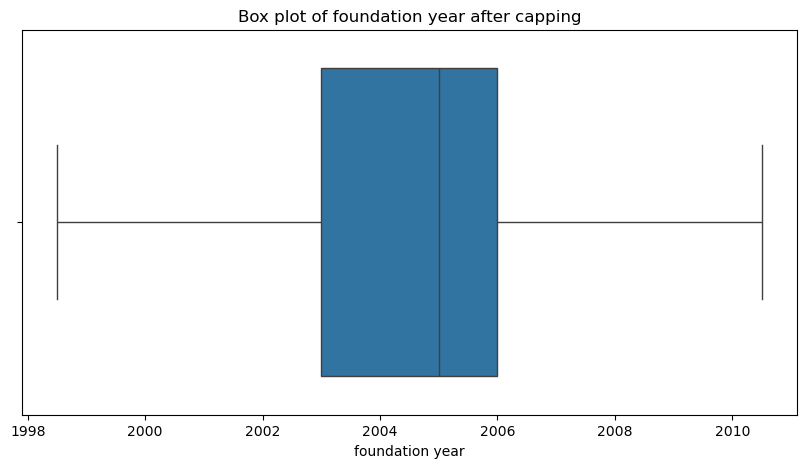

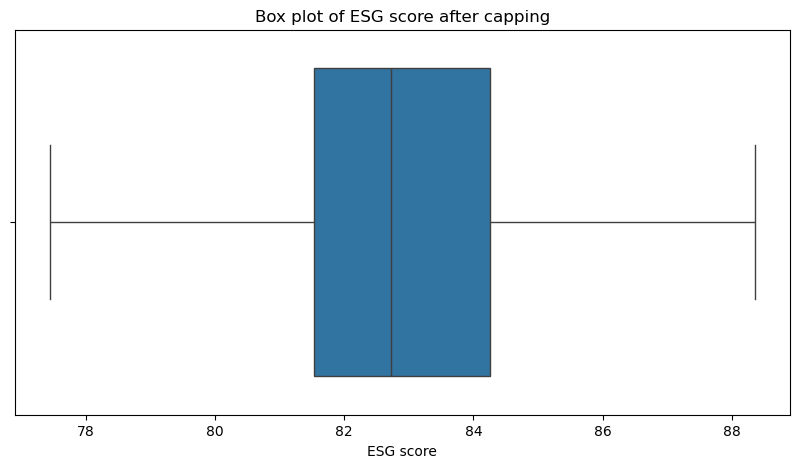

In [26]:
#Se calculan el primer cuartil (Q1) y el tercer cuartil (Q3) para cada columna numérica
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0]
    print(f"Column: {col}, Outliers Count: {outliers_count}")

    # Cap outliers
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print("\nLos valores atípicos se han limitado en columnas numéricas.")


print("\nEstadísticas descriptivas tras la limitación:")
display(df_cleaned[numerical_cols].describe())

# Visualice las distribuciones después de tapar algunas columnas como verificación
cols_to_plot = ['employees', 'revenues', 'foundation year', 'ESG score'] #
for col in cols_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box plot of {col} after capping')
    plt.show()

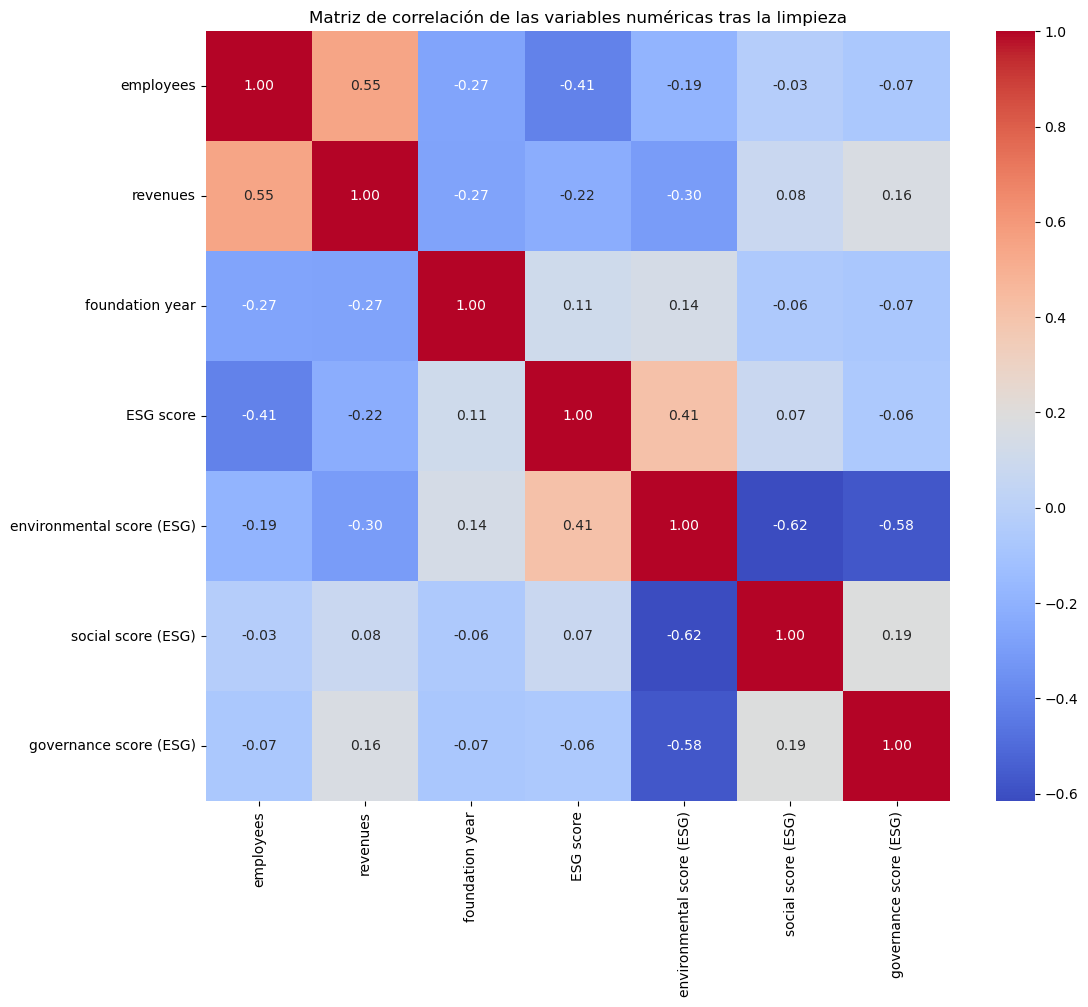

In [29]:
numerical_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns
correlation_matrix_cleaned = df_cleaned[numerical_cols_cleaned].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas tras la limpieza')
plt.show()

* Employees y Revenues (0.49 → 0.55):
Cambio: Aumento de 0.06. La limpieza (capping de 11,869 outliers en empleados y 8,689 en ingresos) redujo el ruido de valores extremos, fortaleciendo la relación lineal. Esto sugiere que los outliers (e.g., "gigantes" con empleados >400,000 o ingresos >5e10) distorsionaban la correlación original al añadir varianza no lineal.
* mployees y ESG score (Nueva: -0.41):
Cambio: No presente en la original (posiblemente oculta por ruido o missing values). La limpieza reveló esta correlación negativa, indicando que empresas más grandes tienden a tener peores puntuaciones ESG.
* Revenues y Environmental score (ESG) (Nueva: -0.30):
Cambio: No destacada en la original. La limpieza destacó esta relación débil-moderada, mostrando que mayores ingresos se asocian con peores puntajes ambientales.

### Guardado del archivo

In [30]:
df_cleaned.to_csv('companies_procesado.csv', index=False)